<a href="https://colab.research.google.com/github/Mafia3641/SpotifyHomework/blob/main/SpotifyHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первичный анализ датасета

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")

### Анализ колонок

In [ ]:
df = pd.read_csv("/content/dataset.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.head())
print("---------------------------------------------------------------")
df.columns

                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4   

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

- track_id - уникальный идентификатор трека;
- artists - список исполнителей;
- album_name - название альбома;
- track_name - название трека;
- popularity - количество прослушиваний за месяц (млн);
- duration_ms - длительность трека в мс;
- explicit - наличие ненормативной лексики (True/False);
- danceability - "заряженность", мелодичность трека (от 0.0 до 1.0);
- energy - энергичность (от 0.0 до 1.0)
- key - ключ;
- loudness - громкость (в Дб);
- mode - модальность (1 - мажор, 0 - минор);
- speechiness - доля речи к общей длине трека (от 0.0 до 1.0);
- acousticness - признак аккустичности (от 0.0 до 1.0);
- instrumentalness - доля инструментальных вставок (чем ближе к 1.0 - тем более инструментально);
- liveness - признак живой записи (чем ближе к 1.0, тем вероятнее записано на концерте);
- valence - эмоциональная окраска (от 0.0 - грустная до 1.0 - радостная);
- tompo - количество ударов в минуту, темп музыки (BPM);
- time_signature - музыкальная размерность (ударов в такт x/4);
- track_genre - жанр трека.

### Размерность датасета

In [ ]:
print(f"Строк: {df.shape[0]}")
print(f"Столбцов: {df.shape[1]}")

Строк: 114000
Столбцов: 20


### Информация по колонкам

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

### Сначала проверим гипотезу (из практики) для нулевой популярности треков. Найдем их общее количество и сравним с ненулевыми.

In [ ]:
total = df['popularity'].count()
null = (df['popularity'] == 0).sum()
not_null = total - null
print(f"Всего треков: {total}\nИз них с нулевой популярностью: {null}\nА ненулевых: {not_null}.")

Всего треков: 114000
Из них с нулевой популярностью: 16020
А ненулевых: 97980.


### Проверим как выглядит график распределения популярности:

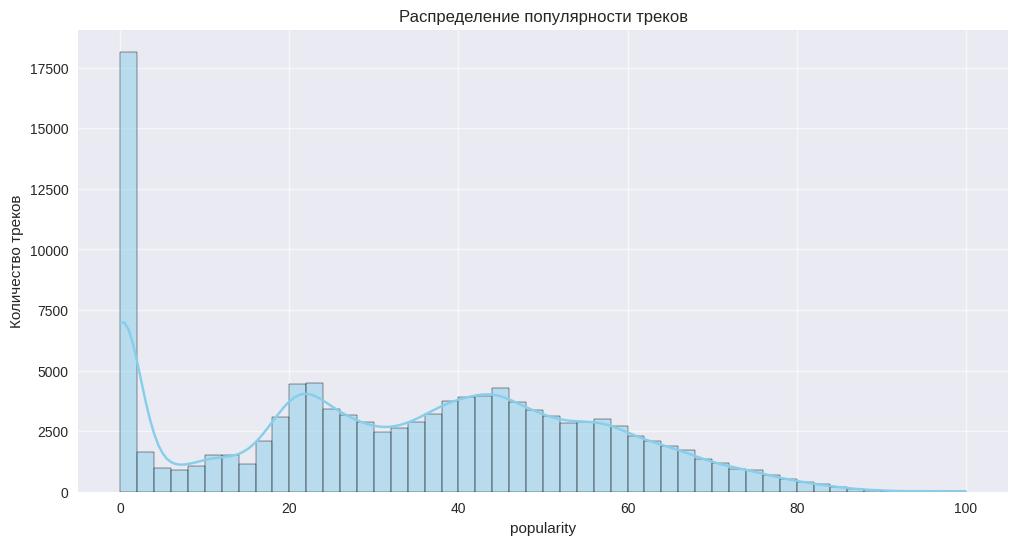

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=50, kde=True, color='skyblue')
plt.ylabel("Количество треков")
plt.title("Распределение популярности треков")
plt.grid(True, alpha=0.6)
plt.show()

Наблюдаем значительное количество треков с популярностью 0, что является аномалией. Возможно, баг платформы, либо очень нишевые треки без аудитории.

Надо проверить, возможно у таких треков одинаковые жанры. Для этого разобьем на группы по жанру и возьмем 10 самых больших из них.

In [ ]:
zeros_pop = df[df['popularity'] == 0]
# Здесь берем по количеству треков, тк популярность=0
zeros_groups = zeros_pop['track_genre'].value_counts().head(10)
zeros_groups

,count
track_genre,
jazz,681
iranian,656
romance,636
soul,611
latin,588
country,587
rock,525
dance,490
alternative,485


Теперь посмотрим на топ жанров среди треков ненулевой популярности:

In [ ]:
no_zeros_pop = df[df['popularity'] > 0]
# Здесь берем топ 10 по популярности
no_zeros_groups = no_zeros_pop.groupby('track_genre')['popularity']\
.mean()\
.nlargest(10)\
.head(10)

no_zeros_groups

,popularity
track_genre,
pop-film,59.401804
k-pop,59.204995
pop,58.161369
electro,57.905297
house,57.212730
chill,55.886458
metal,54.974843
edm,54.909091
indie-pop,54.867746


# Гипотеза 1:
Треки с нулевой популярностью являются частью нишевой группы жанров, в то время как популярные треки принадлежат к группе актуальных и популярных жанров.

## Изучение

### Найдем топ 10 жанров для нулевой/ненулевой популярности

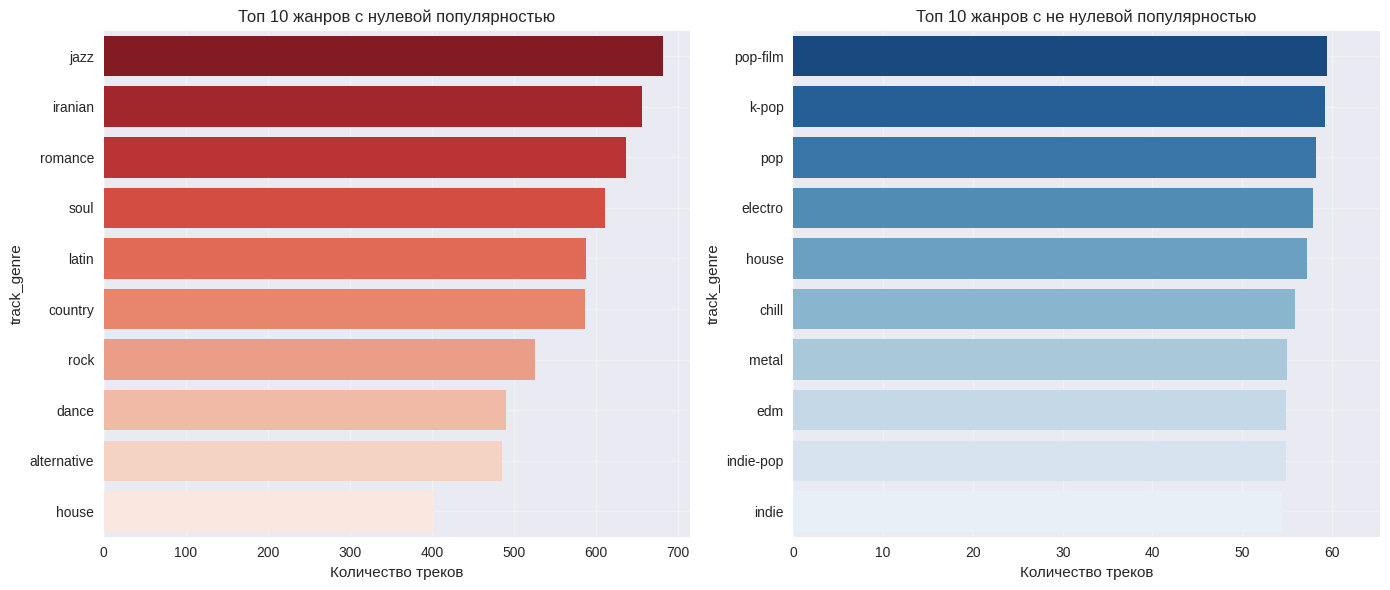

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x= zeros_groups.values,
            y= zeros_groups.index,
            ax= axes[0],
            hue= zeros_groups.index,
            palette= 'Reds_r',
            legend= False,
            dodge= False)
axes[0].set_title('Топ 10 жанров с нулевой популярностью')
axes[0].set_xlabel('Количество треков')
axes[0].grid(True, alpha=0.3)

sns.barplot(x= no_zeros_groups.values,
            y= no_zeros_groups.index,
            ax= axes[1],
            hue= no_zeros_groups.index,
            palette= 'Blues_r',
            legend= False,
            dodge= False)
axes[1].set_title('Топ 10 жанров с не нулевой популярностью')
axes[1].set_xlabel('Количество треков')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, no_zeros_groups.values.max() * 1.1)

plt.tight_layout()
plt.show()


### Вывод

К сожалению, гипотеза не подтвердилась: это довольно популярные жанры, однако группа жанров треков с нулевой популярностью *почти* не пересекается с группой жанров треков высокой популярности:

In [ ]:
no_zeros_set = set(no_zeros_groups.index)
zeros_set = set(zeros_groups.index)
no_zeros_set.intersection(zeros_set)

{'house'}

# Гипотеза 2:

Треки с нулевой популярностью отличаются от остальных особым и уникальным набором иных параметров: мелодичность, длительностью или долей речи в треке.

Поэтому я решил проверить ВСЕ остальные параметры, не включая: track_id, artists, album_name, track_name, popularity, track_genre (по понятным причинам).

### Построим графики сравнения всех параметров

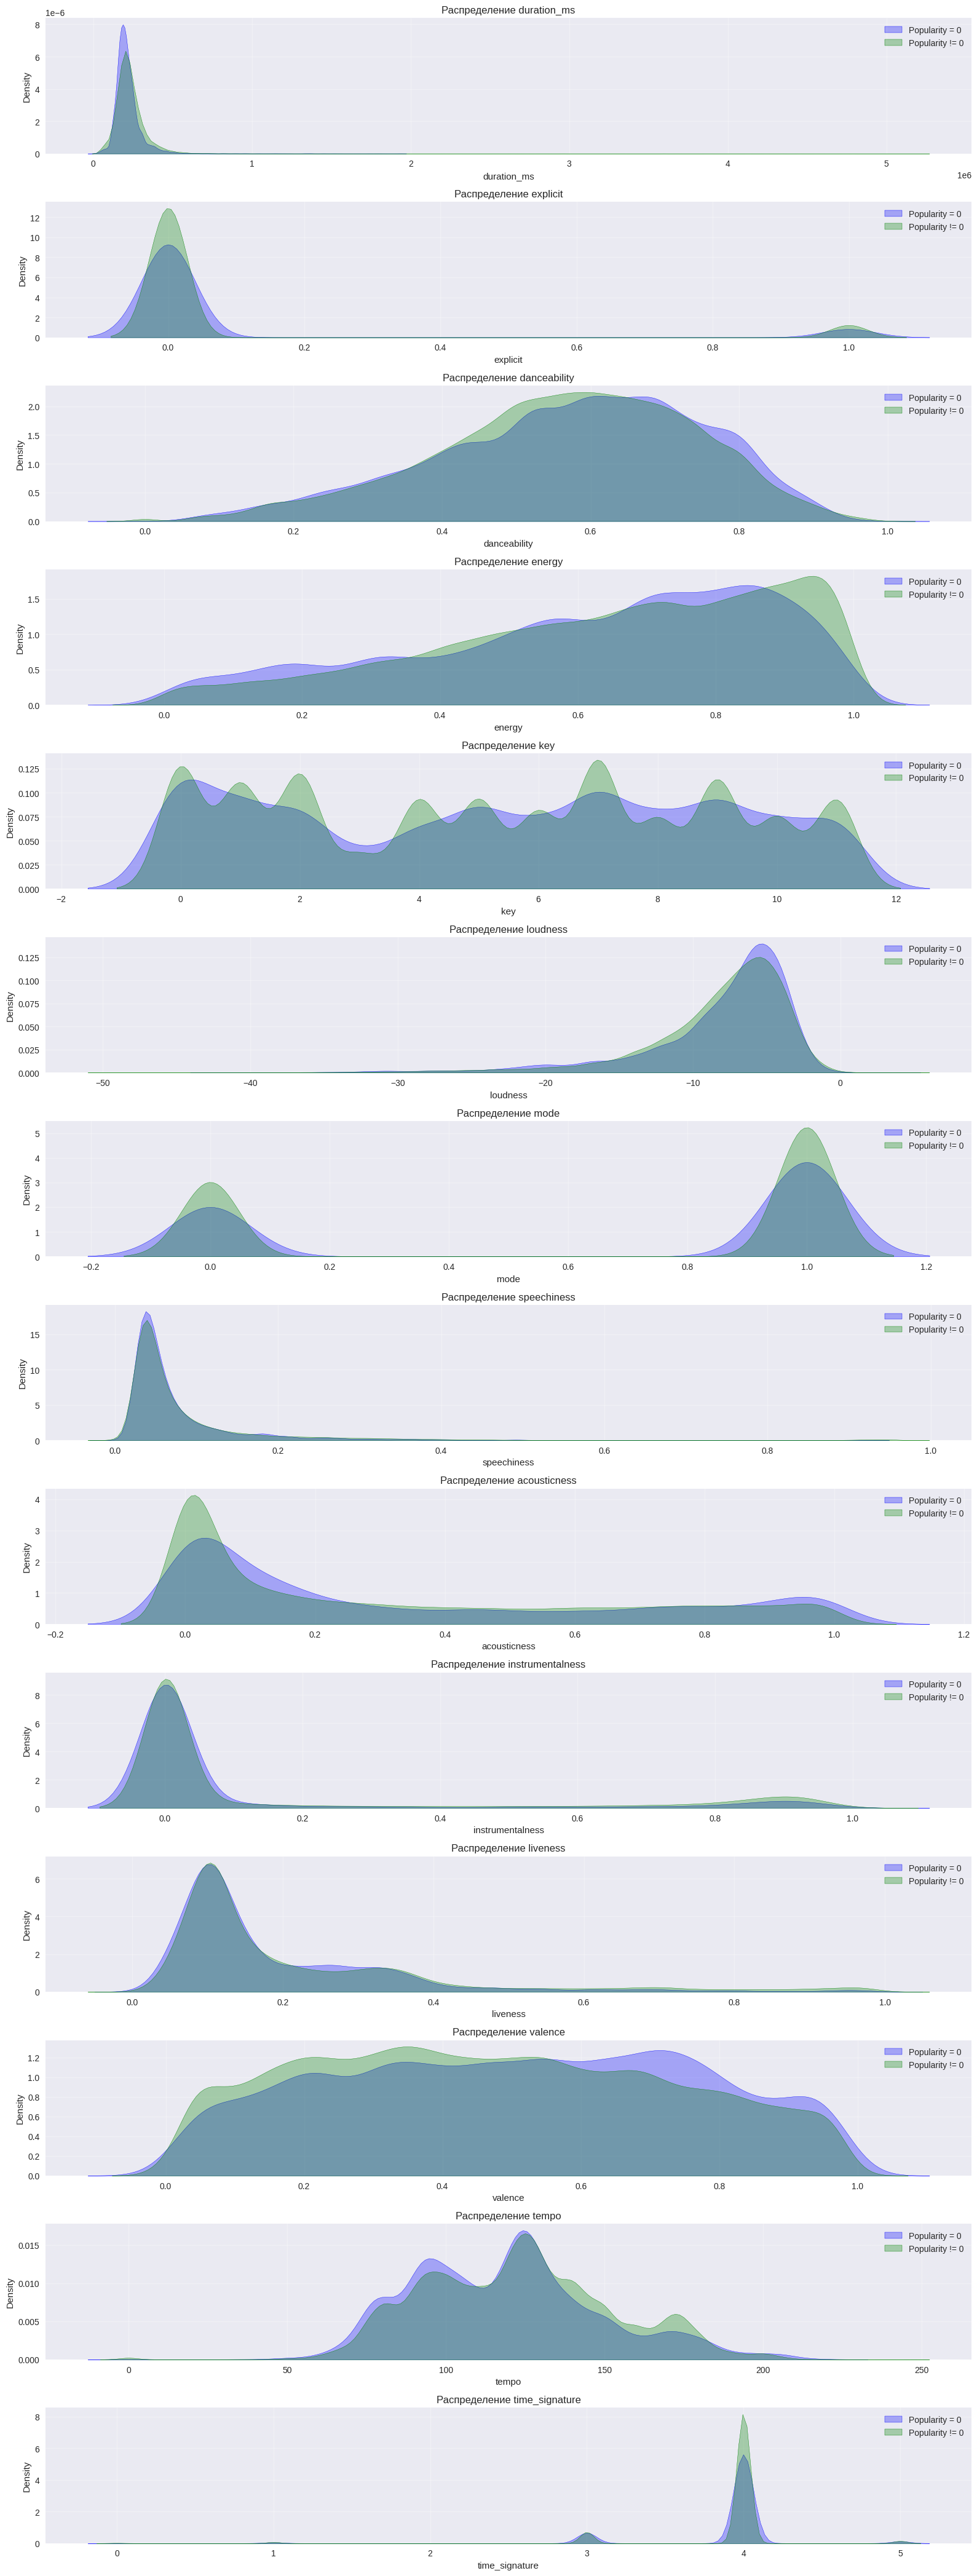

In [ ]:
g2_features = [col for col in df.columns if col not in
 ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'track_genre']]
len_g2 = len(g2_features)

plt.figure(figsize=(16, len_g2*3))
for i, feature in enumerate(g2_features, start=1):
  plt.subplot(len_g2, 1, i)
  sns.kdeplot(
      data=zeros_pop[feature],
      label='Popularity = 0',
      color='blue',
      fill=True,
      alpha=0.3
      )
  sns.kdeplot(
      data=no_zeros_pop[feature],
      label='Popularity != 0',
      color='green',
      fill=True,
      alpha=0.3
      )
  plt.title(f"Распределение {feature}")
  plt.legend()
  plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Вывод

На основании данных графиков я могу сделать вывод: треки с нулевой популярностью в незначительной мере отличаются от треков с ненулевой популярностью во всех измерительных параметрах (энергичность чуть выше), на основании чего можно сделать вывод: отсуствует явная корелляция между популярностью и любым одним ИЗМЕРИМЫМ параметром (линейная).

Гипотеза 2 не подтвердилась.


### Удаляем треки с нулевой популярностью из датасета

Скорее всего треки с 0 прослушиваний были скрыты/удалены с площадки, но, по какой-то причине, попали в датасет, вероятно, из сохранений в базе данных.

Зная это дальнейшую работу будем проводить ТОЛЬКО с треками ненулевой популярности (актуальными, существующими).

In [ ]:
df_new = df[df['popularity'] > 0].copy()
null_pop_track_count = len(df) - len(df_new)
print(f"Было: {len(df)} записей")
print(f"Удалили: {null_pop_track_count}")
print(f"Осталось: {len(df_new)} записей")

Было: 114000 записей
Удалили: 16020
Осталось: 97980 записей


Посмотрим теперь на популярность треков в очищенном датасете:

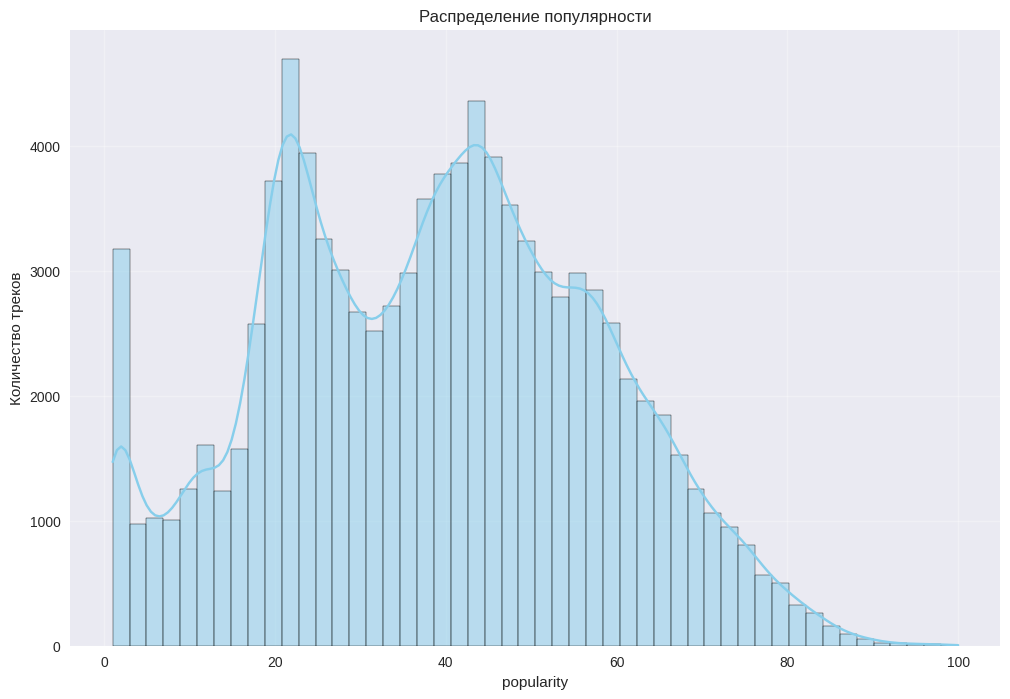

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df_new['popularity'], bins=50, kde=True, color='skyblue')
plt.title('Распределение популярности')
plt.ylabel('Количество треков')
plt.grid(True, alpha=0.3)
plt.show()

## Визуализируем корелляцию измеримых признаков с популярностью

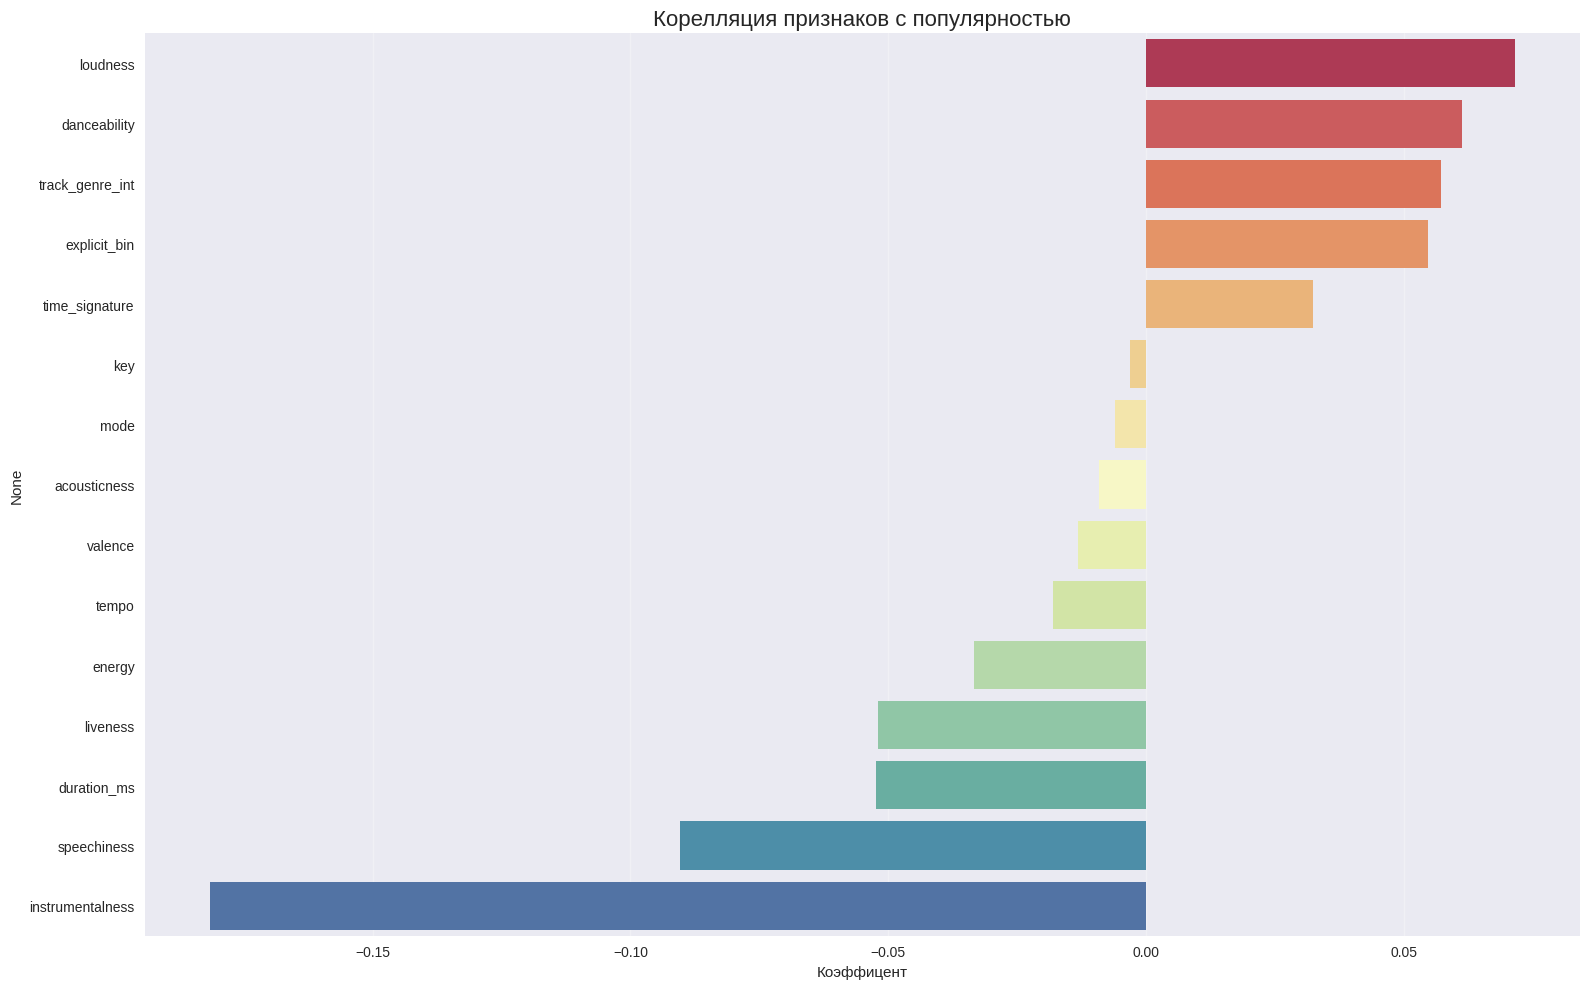

In [ ]:
# Переведем explicit из bool в binary для корректной обработки
df_new['explicit_bin'] = df_new['explicit'].astype(int)
# Используем LabelEncoder для кодирования жанров числовыми значениями
from sklearn.preprocessing import LabelEncoder
df_new['track_genre_int'] = LabelEncoder().fit_transform(df_new['track_genre'])

cors = df_new.select_dtypes(include=[np.number]).corr()['popularity'].sort_values(ascending=False)

plt.figure(figsize=(16, 10))
sns.barplot(
    x=cors.values[1:],
    y=cors.index[1:],
    hue=cors.index[1:],
    palette='Spectral',
    legend=False,
    dodge=False
    )
plt.title('Корелляция признаков с популярностью', fontsize=16)
plt.xlabel('Коэффицент')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Вывод

На основе данного графика можно сделать вывод: наибольную корелляцию с популярностью имеют признаки: громкость (loudness), танцевальность (danceability), жанр трека (genre_int), наличие ненормативной лексики (explicit).

# Гипотеза 3:

Треки с высокой громкостью (параметр loudness) имеют бОльшую популярность, поскольку воспринимаются как более энергичные, более яркие из-за чего чаще встречаются в плейлистах.

## Распределение громкости к популярности

### График

/tmp/ipython-input-2019821080.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


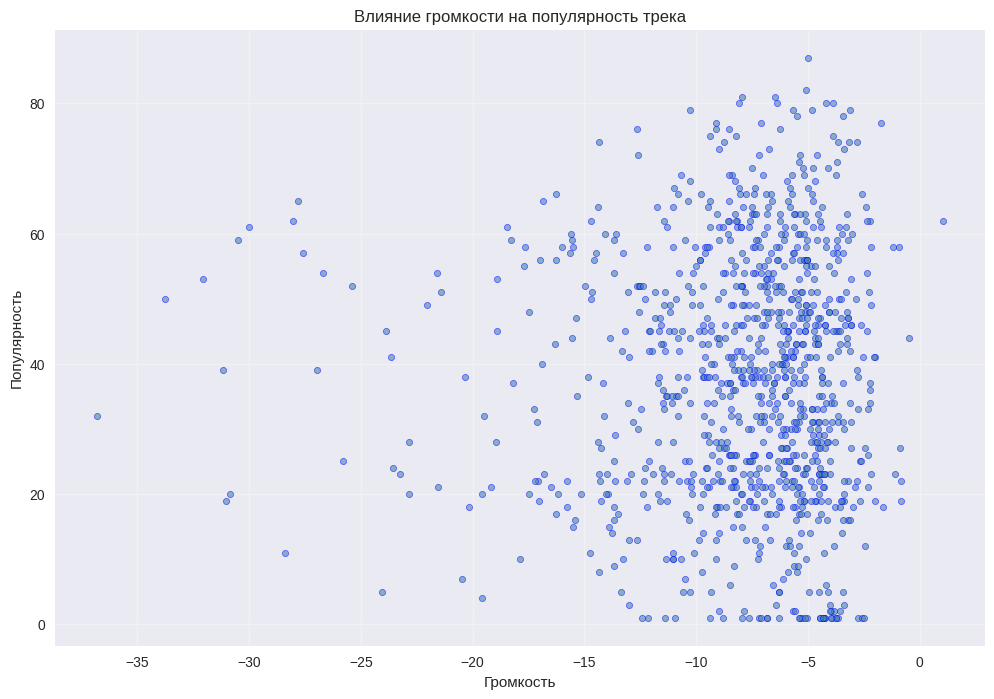

In [ ]:
plt.figure(figsize=(12, 8))
selection = df_new.sample(n=1000, random_state=40)
plt.scatter(
    selection['loudness'],
    selection['popularity'],
    alpha=0.6,
    s=20,
    color='steelblue',
    edgecolors='blue',
    linewidth=0.5
    )
plt.title('Влияние громкости на популярность трека')
plt.xlabel('Громкость')
plt.ylabel('Популярность')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Вывод

На основании данного графика мы можем сделать вывод, что чем выше громкость, тем, зачастую, выше популярность трека. Это может быть связано с феноменом "Война громкости" - теорией, что каждое десятилетие средняя громкость популярных треков увеличивается.

# Гипотеза 4:
Треки с высоким показателем танцевальности и определенным жанром имеют выше популярность, поскольку используются чаще на радиостанциях и дискотеках, нежели спокойные и менее ритмичные треки.

### График

/tmp/ipython-input-170534285.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='group', y='median_popularity', palette='Blues_r')


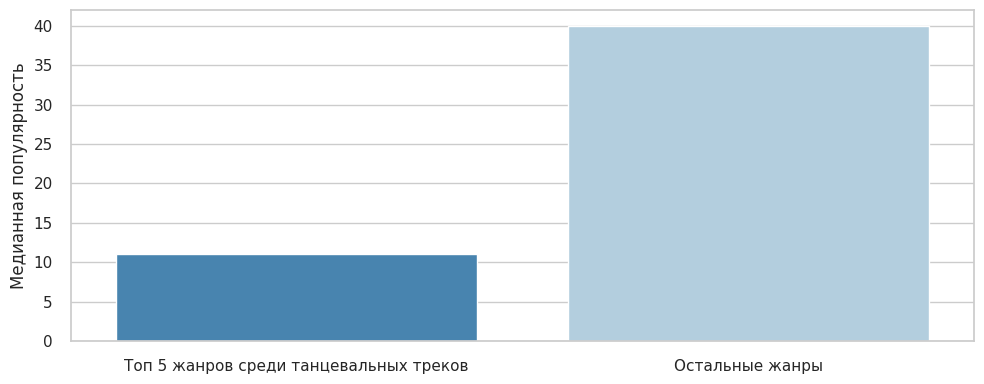

In [ ]:
df = df_new.copy()

genre_dance = df.groupby('track_genre')['danceability'].mean()
top5_genres = genre_dance.sort_values(ascending=False).head(5).index

median_top5 = df[df['track_genre'].isin(top5_genres)]['popularity'].median()
median_rest = df[~df['track_genre'].isin(top5_genres)]['popularity'].median()

plot_df = pd.DataFrame({
    'group': ['Топ 5 жанров среди танцевальных треков', 'Остальные жанры'],
    'median_popularity': [median_top5, median_rest]
})

sns.set(style='whitegrid')
plt.figure(figsize=(10,4))
sns.barplot(data=plot_df, x='group', y='median_popularity', palette='Blues_r')
plt.xlabel('')
plt.ylabel('Медианная популярность')
plt.tight_layout()
plt.show()


### Вывод

На графике мы видим: топ 5 самых танцевальных жанров в значительной степени уступают по популярности трекам других жанров.

Разберемся, почему так происходит: сравним как много жанров из выборки (топ 10 среди самых НЕ популярных жанров) входят в топ 5 самых танцевальных жанров:

In [ ]:

non_popular_gernres = df_new[df_new['popularity'] < 10]['track_genre']\
  .value_counts()\
  .head(10)\
  .index
len(set(non_popular_gernres) & set(top5_genres))

5

Получается, все 5 самых танцевальных жанра находятся среди топ 10 самых НЕ популярных жанров.

Гипотеза опровергнута.

## Гипотеза 4.2

Тогда новый план: найдем топ 5 самых прослушиваемых жанров и сравним их медианную популярность с треками остальных жанров:

### График

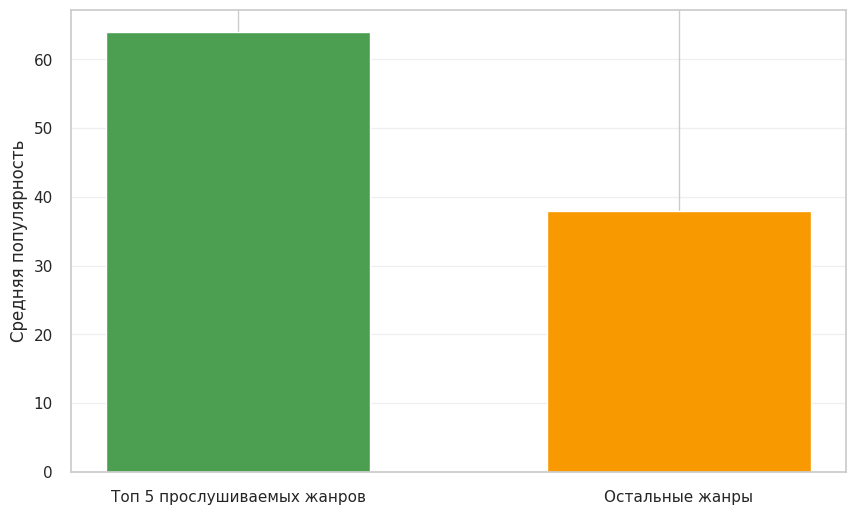

In [ ]:
# Топ-5 жанров по популярности (среднее)
top_genres = df_new.groupby('track_genre')['popularity'].mean().nlargest(5).index
top_mask = df_new['track_genre'].isin(top_genres)

categories = ['Топ 5 прослушиваемых жанров', 'Остальные жанры']
values = [
    df_new.loc[top_mask, 'popularity'].median(),
    df_new.loc[~top_mask, 'popularity'].median()
]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, width=0.6, color=['#4C9F50', '#F99900'])
plt.ylabel('Средняя популярность')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

### Вывод

Видим, что жанр в значительной степени влияет на популярность трека. Проверим, какие жанры входят в топ 5:

In [ ]:
top_genres

Index(['pop-film', 'k-pop', 'pop', 'electro', 'house'], dtype='object', name='track_genre')

Как и ожидалось, это довольно массовые жанры, проверим насколько треки этих жанров отличаются в параметрах от треков других жанров:

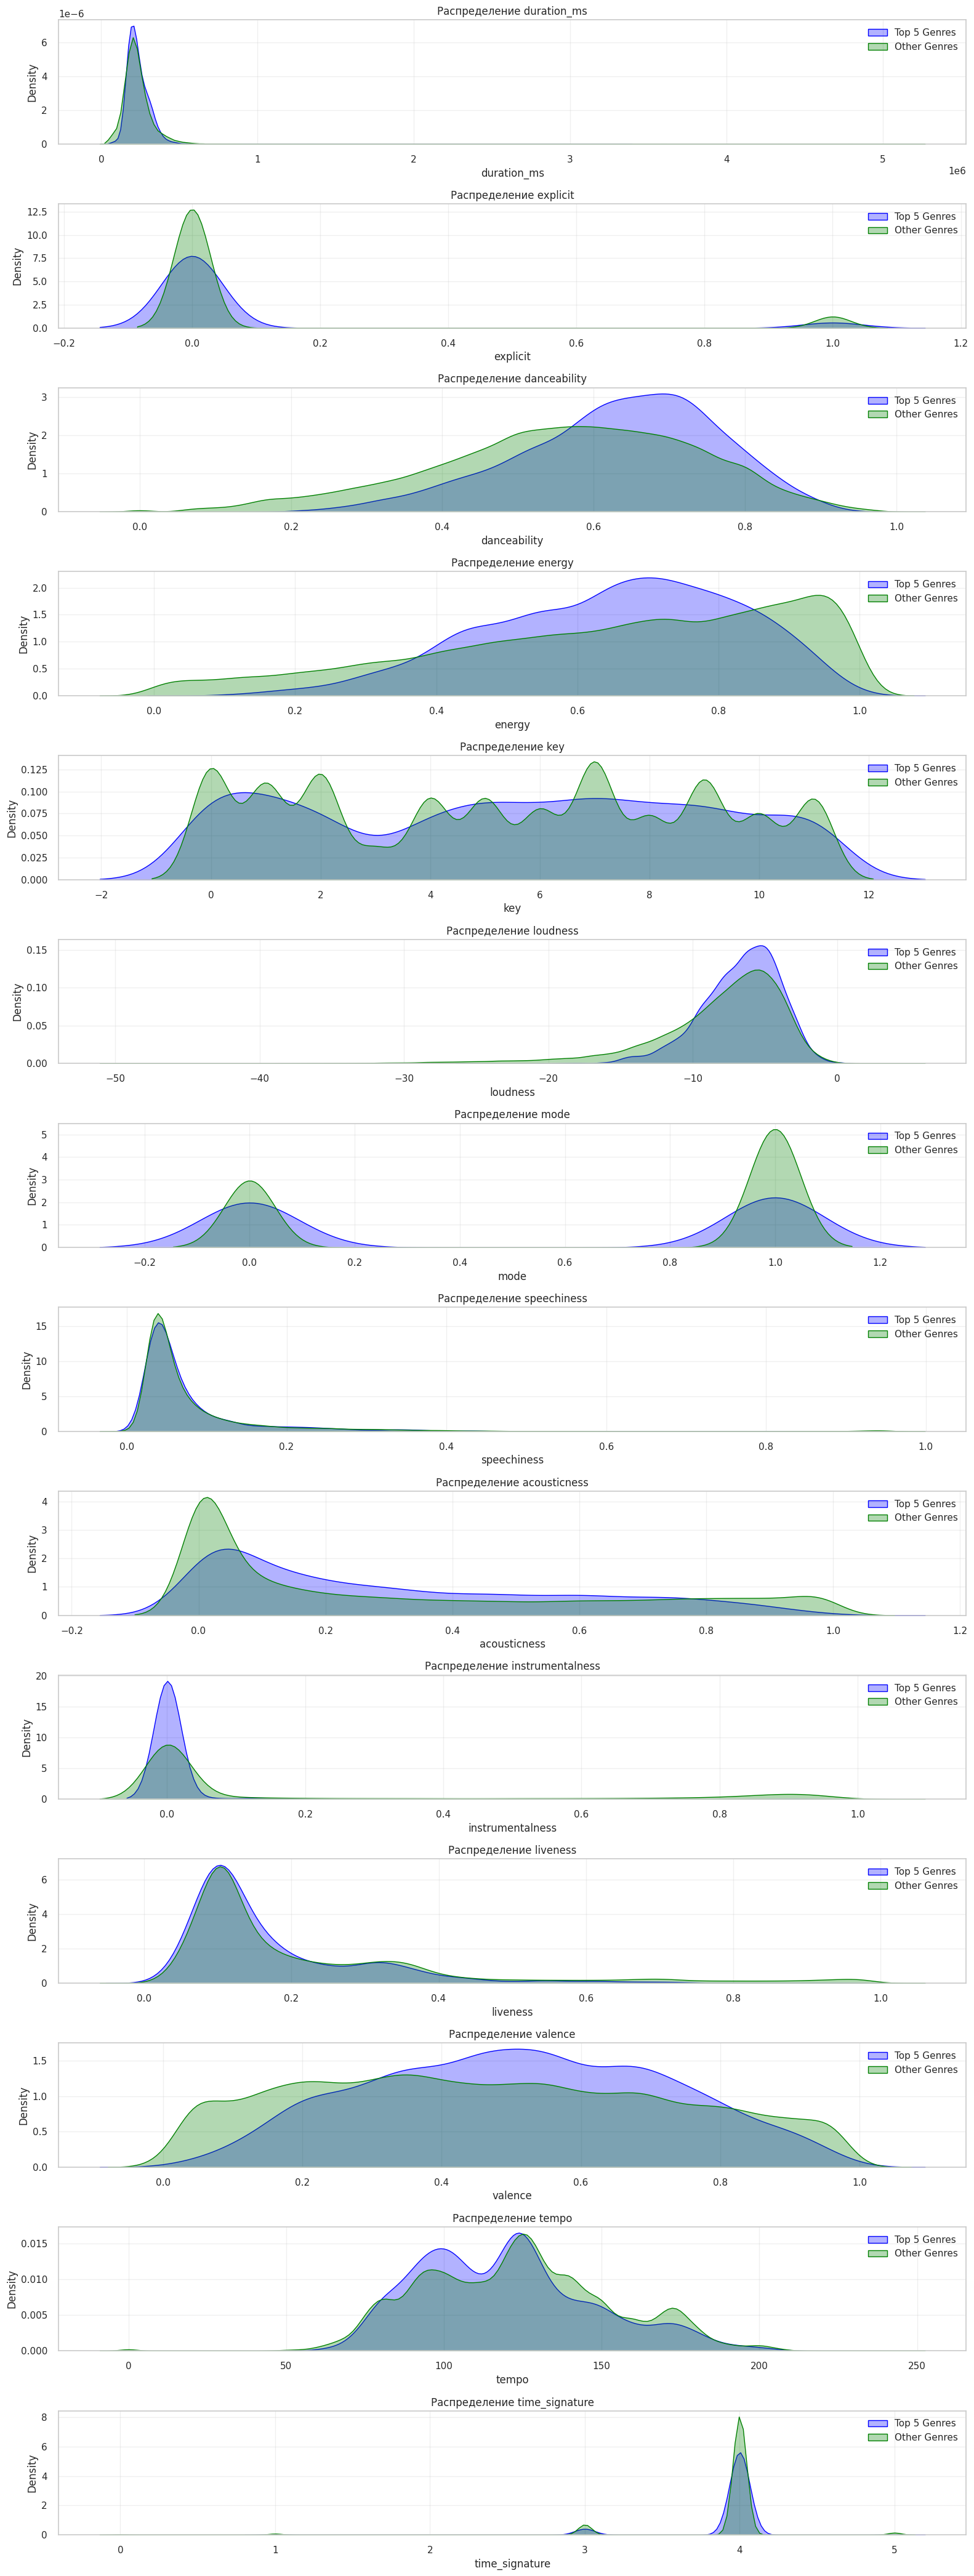

In [ ]:
top_tracks = df_new[top_mask]
other_tracks = df_new[~top_mask]

plt.figure(figsize=(16, len_g2*3))
for i, feature in enumerate(g2_features, start=1):
    plt.subplot(len_g2, 1, i)
    sns.kdeplot(
        data=top_tracks[feature],
        label='Top 5 Genres',
        color='blue',
        fill=True,
        alpha=0.3
    )
    sns.kdeplot(
        data=other_tracks[feature],
        label='Other Genres',
        color='green',
        fill=True,
        alpha=0.3
    )
    plt.title(f"Распределение {feature}")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Видим (отличия от треков остальных жанров):
- Повышенное использование ненормативной лексики;
- Нейтральную эмоциональную окраску;
- Умеренная энергичность;
- Отсутствие инструментальности;
- **Повышенную танцевальность (danceability).**



На основе чего можем сделать вывод:

треки из наиболее прослушиваемых жанров зачастую имеют более спокойный "вайб", при этом повышенную танцевальность при отсутствии инструментальности, что **подтверждает нашу теорию**.

А теперь попробуем на основе всех исследований вывести новую колонку: потенциал "хитовости": число от 0.0 до 1.0, показывающее, насколько вероятно трек станет "хитом" -> прямая корелляция с популярностью.

Для этого используем лучшее из найденного: лучшие жанры, повышенная громкость, наличие ненормативной лексики.

In [ ]:
# Добавим колонку: является ли жанр трека одним из топ-жанров
df_new['is_top_genre'] = df_new['track_genre'].isin(top_genres).astype(int)
# Теперь добавим колонку для треков с громкостью выше средней
mean_loudness = df_new['loudness'].mean()
df_new['is_high_loudness'] = (df_new['loudness'] > mean_loudness).astype(int)

# И добавим колонку для треков с танцевальностью выше средней
mean_danceability = df_new['danceability'].mean()
df_new['is_high_danceability'] = (df_new['danceability'] > mean_danceability).astype(int)

# На основе чего делаем подсчет коэфицента хитовости и добавляем колонку
df_new['hit_score_dance'] = (
    df_new['is_top_genre'] * 0.4 +
    df_new['is_high_loudness'] * 0.3 +
    df_new['is_high_danceability'] * 0.3
)



Создадим визуальное отображения новой колонки в действии:

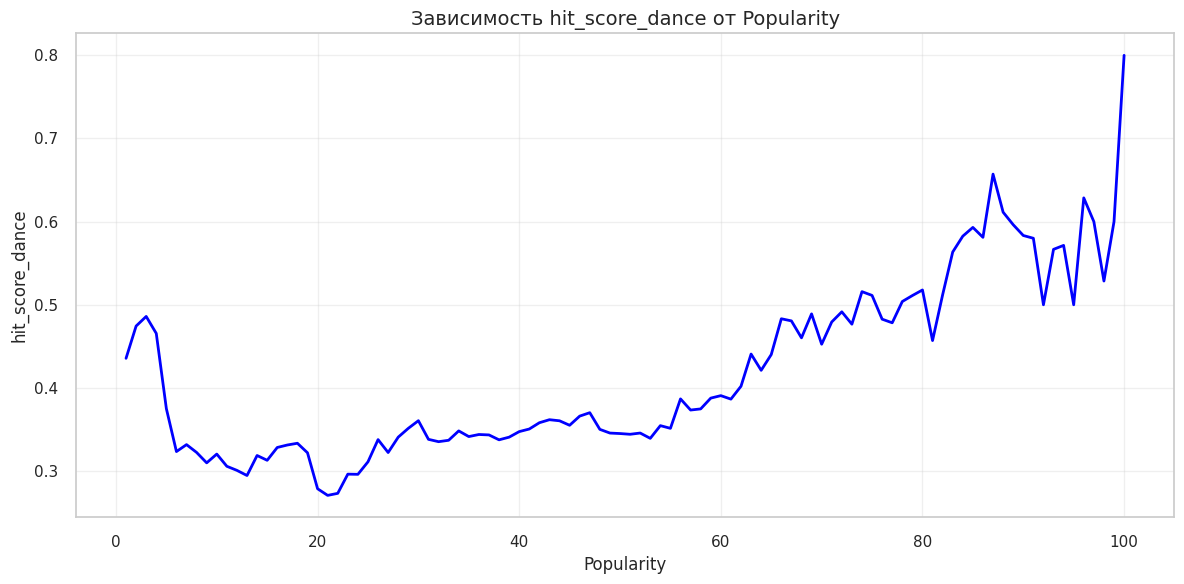


Корреляция с таргетом: 14.1%


In [ ]:
df_sorted = df_new.sort_values('popularity')

# Создаем график
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_sorted,
    x='popularity',
    y='hit_score_dance',
    estimator='mean',
    errorbar=None,
    linewidth=2,
    color='blue'
)

# Делаем график похожим на волну
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('hit_score_dance', fontsize=12)
plt.title('Зависимость hit_score_dance от Popularity', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

hit_corr = df_new['hit_score_dance'].corr(df_new['popularity'])
print()
print(f"Корреляция с таргетом: {hit_corr*100:.1f}%")

Из данного графика можно сделать вывод, что новая колонка хитовости в действительности кореллирует с таргетом в некоторой степени, однако присутствуют незначительные выбросы (около 2%) для треков с преднулевой популярностью. Возможно, это связано с качеством датасета (треки с нулевой популярностью).

# Векторизация

## Подготовка данных

### Для начала проверим, сколько осталось категориальных признаков в датасете


In [ ]:
print("Текущие типы данных:")
print(df_new.dtypes.value_counts())

print("\nКатегориальные признаки:")
categorical_cols = df_new.select_dtypes(include=['object', 'category']).columns
print(categorical_cols.tolist())

print("\nЧисловые признаки:")
numeric_cols = df_new.select_dtypes(include=[np.number]).columns
print(numeric_cols.tolist())

print(f"\nВсего признаков: {len(df_new.columns)}")
print(f"Категориальных: {len(categorical_cols)}")
print(f"Числовых: {len(numeric_cols)}")

Текущие типы данных:
int64      10
float64    10
object      5
bool        1
Name: count, dtype: int64

Категориальные признаки:
['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

Числовые признаки:
['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit_bin', 'track_genre_int', 'is_top_genre', 'is_high_loudness', 'is_high_danceability', 'hit_score_dance']

Всего признаков: 26
Категориальных: 5
Числовых: 20


Теперь добавим main_artist_id - закодируем каждого исполнителя, найдем его среднюю популярность и для каждого трека укажем id наиболее популярного исполнителя (ожидается сильная корелляция с таргетом)

In [ ]:
# Создадим функцию, что будет разбивать строку с исполнителями.
# На случай если их в треке несколько, разбиваем по ;
all_artists_set = set()

def split_artists(artist_string):
    """Разбивает строку с исполнителями на список"""
    if pd.isna(artist_string):
        return []
    return [artist.strip() for artist in str(artist_string).split(';')]

# Создадим новую колонку со списокм всех исполнителей трека, применив
# функцию разбиения.
df_new['artists_list'] = df_new['artists'].apply(split_artists)

# Теперь создадим множество всех исполнителей
all_artists_set = set()
for artist in df_new['artists_list']:
    all_artists_set.update(artist)

# Для каждого исполнителя создадим id
artist_to_id = {}
artist_id_counter = 0

for artist in sorted(all_artists_set):
    artist_to_id[artist] = artist_id_counter
    artist_id_counter += 1


Теперь для каждого артиста определим его среднюю популярность **на сольных треках**

In [ ]:
artist_solo_stats = {}
artist_total_stats = {}

for idx, row in df_new.iterrows():
    artists = row['artists_list']
    popularity = row['popularity']

    # Если исполнитель один - это сольный трек
    if len(artists) == 1:
        artist = artists[0]
        if artist not in artist_solo_stats:
            artist_solo_stats[artist] = {'total': 0, 'count': 0}

        artist_solo_stats[artist]['total'] += popularity
        artist_solo_stats[artist]['count'] += 1

    # Добавляем тоже тех, кто не имеет сольных треков
    for artist in artists:
        if artist not in artist_total_stats:
            artist_total_stats[artist] = {'total': 0, 'count': 0}

        artist_total_stats[artist]['total'] += popularity
        artist_total_stats[artist]['count'] += 1

artist_avg_popularity = {}

for artist in artist_to_id.keys():
    # Если исполнитель есть среди соло исполнителей и у него есть соло треки
    if artist in artist_solo_stats and artist_solo_stats[artist]['count'] > 0:
        avg_pop = artist_solo_stats[artist]['total'] / artist_solo_stats[artist]['count']
    # Если сольных треков нет, берем статистику общую (где он есть среди нескольких исполнителей)
    elif artist in artist_total_stats and artist_total_stats[artist]['count'] > 0:
        avg_pop = artist_total_stats[artist]['total'] / artist_total_stats[artist]['count']
    else:
        avg_pop = 0

    artist_avg_popularity[artist] = avg_pop

print(f"Вычислена средняя популярность для {len(artist_avg_popularity)}/{artist_id_counter} исполнителей")

Вычислена средняя популярность для 28579/28579 исполнителей


Теперь определим для каждого трека главного исполнителя: у кого больше средняя популярность - тот будет основным.

In [ ]:
def get_main_artist_id(artists_list):
    """
    Возвращает ID артиста с максимальной средней популярностью среди
    всех из списка.
    Если артист один - возвращаем его ID.
    """
    if not artists_list:
        return -1

    if len(artists_list) == 1:
        return artist_to_id[artists_list[0]]

    max_pop = -1
    main_artist = None

    for artist in artists_list:
        pop = artist_avg_popularity.get(artist, 0)
        if pop > max_pop:
            max_pop = pop
            main_artist = artist

    if main_artist is None:
        return artist_to_id[artists_list[0]]

    return artist_to_id[main_artist]

# Создаем колонку main_artist_id - главный исполнитель в треке
df_new['main_artist_id'] = df_new['artists_list'].apply(get_main_artist_id)

# Проверяем распределение
print(f"Уникальных main_artist_id: {df_new['main_artist_id'].nunique()}")
print(f"Количество треков без артиста: {(df_new['main_artist_id'] == -1).sum()}")

Уникальных main_artist_id: 20107
Количество треков без артиста: 0


### Проверим что у нас получилось:

In [ ]:

sample = df_new[['artists', 'artists_list', 'main_artist_id', 'popularity']].head(10)
id_to_artist = {v: k for k, v in artist_to_id.items()}
sample['main_artist_name'] = sample['main_artist_id'].apply(lambda x: id_to_artist.get(x, 'Unknown'))

print(sample)

# Проверяем корреляцию между средней популярностью артиста и популярностью трека
df_new['main_artist_avg_pop'] = df_new['main_artist_id'].apply(
    lambda x: artist_avg_popularity.get(id_to_artist.get(x, ''), 0)
)

correlation = df_new['main_artist_avg_pop'].corr(df_new['popularity'])
print()
print(f"Корреляция между средней популярностью основного артиста и популярностью трека: {correlation:.4f}")

                                artists  \
0                           Gen Hoshino   
1                          Ben Woodward   
2                Ingrid Michaelson;ZAYN   
3                          Kina Grannis   
4                      Chord Overstreet   
5                          Tyrone Wells   
6  A Great Big World;Christina Aguilera   
7                            Jason Mraz   
8             Jason Mraz;Colbie Caillat   
9                        Ross Copperman   

                              artists_list  main_artist_id  popularity  \
0                            [Gen Hoshino]            9119          73   
1                           [Ben Woodward]            2774          55   
2                [Ingrid Michaelson, ZAYN]           27574          57   
3                           [Kina Grannis]           13273          71   
4                       [Chord Overstreet]            4587          82   
5                           [Tyrone Wells]           26110          58   
6  [A Gr

## Итоговый вид датасета (колонки)

In [ ]:
# Удаляем временную колонку
df_new = df_new.drop(columns=['artists_list'])
df_new.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'explicit_bin',
       'track_genre_int', 'is_top_genre', 'is_high_loudness',
       'is_high_danceability', 'hit_score_dance', 'main_artist_id',
       'main_artist_avg_pop'],
      dtype='object')

Мы получили многообещающую колонку с очень высокой корелляцией с таргетом. Вероятно, эта колонка ляжет в основу оценки популярности трека.

# Простая модель

## Подготовим данные

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np

features = [
    'main_artist_avg_pop',
    'hit_score_dance',
    'danceability',
    'energy',
    'mode',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'explicit_bin',
    'track_genre_int',
]
X = df_new[features].copy()
y = df_new['popularity'].values

X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=5)
)

print(f"Размеры данных:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Размеры данных:
X_train: (78384, 15)
X_test: (19596, 15)
y_train: (78384,)
y_test: (19596,)


## Обучение

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='linear')
])

model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),

    keras.callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_loss',
        save_best_only=True
    ),

    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    )
]

# Обучение
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=16,
    batch_size=32,
    callbacks=callbacks,
)

y_pred = model.predict(X_test_scaled).flatten()
f_r2 = r2_score(y_test, y_pred)
f_test_loss, f_test_mae, f_test_mse = model.evaluate(X_test_scaled, y_test, verbose=0)
f_test_rmse = np.sqrt(f_test_mse)

print()
print("Оценка на тестовых данных:")
print(f"Test MSE: {f_test_mse:.4f}")
print(f"Test MAE: {f_test_mae:.4f}")
print(f"Test RMSE: {f_test_rmse:.4f}")
print(f"Test R² Score: {f_r2:.4f}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
2450/2450 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1787.0634 - mae: 38.0261 - mse: 1787.0634 - val_loss: 1606.6262 - val_mae: 36.4118 - val_mse: 1606.6262 - learning_rate: 0.0010
Epoch 2/16
2450/2450 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1551.7031 - mae: 35.8847 - mse: 1551.7031 - val_loss: 1390.4252 - val_mae: 34.2093 - val_mse: 1390.4252 - learning_rate: 0.0010
Epoch 3/16
2450/2450 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1344.9678 - mae: 33.7187 - mse: 1344.9678 - val_loss: 1199.5884 - val_mae: 32.0045 - val_mse: 1199.5884 - learning_rate: 0.0010
Epoch 4/16
2450/2450 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1156.3201 - mae: 31.4589 - mse: 1156.3201 - val_loss: 1030.5739 - val_mae: 29.8086 - val_mse: 1030.5739 - learning_rate: 0.0010
Epoch 5/16
2450/2450 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 991.1340 - mae: 29.2498 - mse: 991.1340 - val_loss: 881.2957 - val_mae: 27.6253 - val_mse: 881.2957 - learning_rate: 0.0010
Epoch 6/16
2450/2450 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step 

Для простой линейной модели ошибка в пределах нормы, однако из-за простоты модели она, вероятно, опирается только на 2-3 признака в формировании оценки.

## Оценка простой модели:

613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


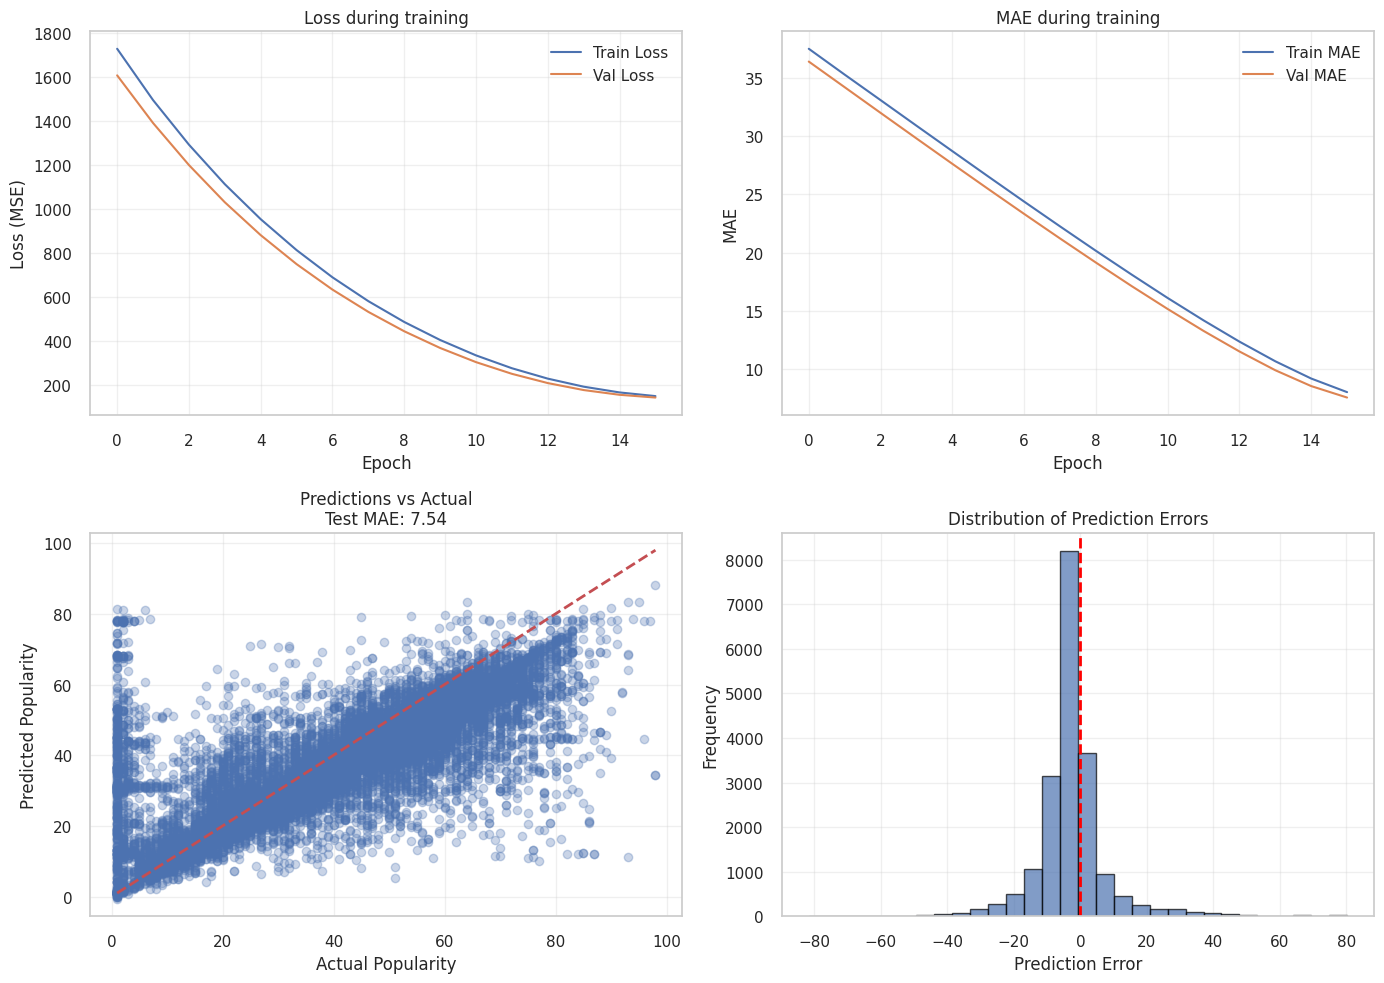

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Потери
axes[0, 0].plot(history.history['loss'], label='Train Loss')
axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
axes[0, 0].set_title('Loss during training')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# mean absolute error
axes[0, 1].plot(history.history['mae'], label='Train MAE')
axes[0, 1].plot(history.history['val_mae'], label='Val MAE')
axes[0, 1].set_title('MAE during training')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Предсказание
y_pred = model.predict(X_test_scaled).flatten()

axes[1, 0].scatter(y_test, y_pred, alpha=0.3)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Popularity')
axes[1, 0].set_ylabel('Predicted Popularity')
axes[1, 0].set_title(f'Predictions vs Actual\nTest MAE: {f_test_mae:.2f}')
axes[1, 0].grid(True, alpha=0.3)

# Распределение ошибок
errors = y_pred - y_test
axes[1, 1].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Prediction Error')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Errors')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Наблюдаем плавное уменьшение ошибки по мере обучения. Это характерно для простых линейных моделей, высок риск недообучения.

### Проанализируем важность признаков

Через веса первого слоя

                feature  importance
0   main_artist_avg_pop   14.997763
8      instrumentalness    0.467754
6           speechiness    0.342626
2          danceability    0.318269
3                energy    0.158392
12          duration_ms    0.102273
14      track_genre_int    0.070363
5              loudness    0.068719
11                tempo    0.042236
1       hit_score_dance    0.028901
7          acousticness    0.028833
9              liveness    0.024413
13         explicit_bin    0.011159
4                  mode    0.005313
10              valence    0.002528


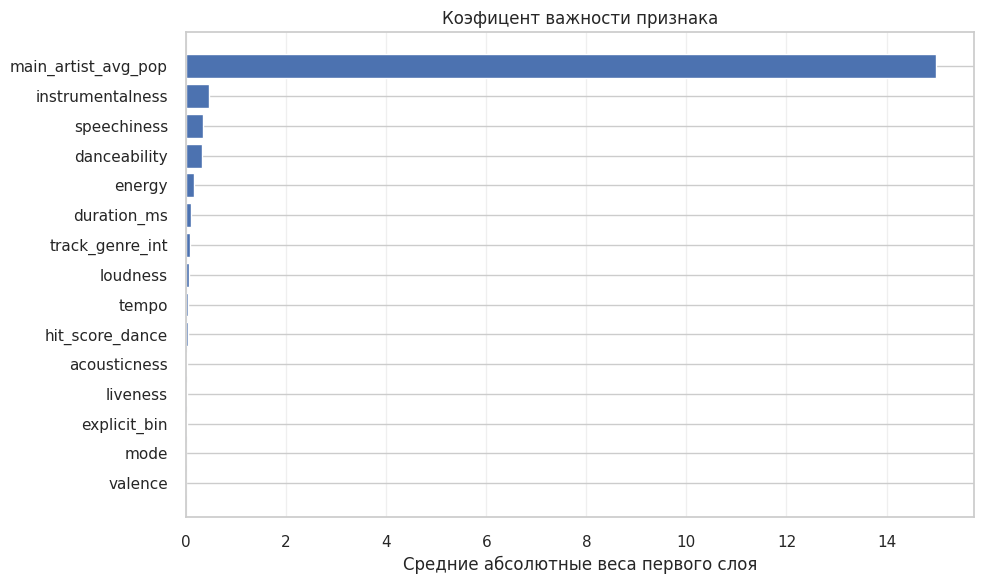

In [ ]:
first_layer_weights = model.layers[0].get_weights()[0]
feature_importance = np.abs(first_layer_weights).mean(axis=1)

importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importance
}).sort_values('importance', ascending=False)
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_df)), importance_df['importance'][::-1])
plt.yticks(range(len(importance_df)), importance_df['feature'][::-1])
plt.xlabel('Средние абсолютные веса первого слоя')
plt.title('Коэфицент важности признака')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

Видим, как модель делает слишком большой упор на main_artist_avg_pop, назначая ему слишком большие веса. Это происходит в следвтвие использования слишком простой структуры, отсутствии L2 регуляризации.

# Более сложные модели

## Сложная линейная

### Обучение

Создадим модель, которая будет использовать: L1/L2 регуляризацию, полиномиальные признаки, huber loss:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

scaler_poly = StandardScaler()
X_poly_train_scaled = scaler_poly.fit_transform(X_train_poly)
X_poly_test_scaled = scaler_poly.transform(X_test_poly)


model = keras.Sequential([
    layers.Dense(
        units=1,
        activation='linear',
        kernel_initializer=keras.initializers.GlorotUniform(seed=42),
        kernel_regularizer=keras.regularizers.l1_l2(l1=0.0005, l2=0.005),
        bias_regularizer=keras.regularizers.l2(0.0005),
        input_shape=(X_poly_train_scaled.shape[1],)
    )
])

model.summary()

optimizer = keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False
)

model.compile(
    optimizer=optimizer,
    loss=keras.losses.Huber(delta=1.5),
    metrics=[
        'mae',
        'mse',
        keras.metrics.RootMeanSquaredError(name='rmse')
    ]
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=9,
        restore_best_weights=True,
        min_delta=0.00001,
        verbose=1,
        mode='min'
    ),

    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1,
        mode='min',
        cooldown=2
    ),

    keras.callbacks.ModelCheckpoint(
        'best_complex_linear_model.keras',
        monitor='val_mse',
        save_best_only=True,
        save_weights_only=False,
        verbose=1,
        mode='min'
    ),

    keras.callbacks.TensorBoard(
        log_dir='./logs',
        histogram_freq=0,
        write_graph=True,
        update_freq='epoch'
    )
]


history = model.fit(
    X_poly_train_scaled, y_train,
    validation_data=(X_poly_test_scaled, y_test),
    epochs=40,
    batch_size=64,
    callbacks=callbacks,
    verbose=1,
    shuffle=True,
    validation_freq=1
)

y_pred = model.predict(X_poly_test_scaled).flatten()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136 (544.00 B)

 Trainable params: 136 (544.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
1221/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.4344 - mae: 35.6767 - mse: 1643.1892 - rmse: 40.5102
Epoch 1: val_mse improved from inf to 1057.26428, saving model to best_complex_linear_model.keras
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 52.4176 - mae: 35.6655 - mse: 1642.3699 - rmse: 40.4999 - val_loss: 39.9024 - val_mae: 27.2396 - val_mse: 1057.2643 - val_rmse: 32.5156 - learning_rate: 0.0100
Epoch 2/40
1222/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.0647 - mae: 24.6241 - mse: 898.5134 - rmse: 29.9325
Epoch 2: val_mse improved from 1057.26428 to 479.89166, saving model to best_complex_linear_model.keras
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 36.0520 - mae: 24.6154 - mse: 898.0150 - rmse: 29.9239 - val_loss: 24.9073 - val_mae: 16.9666 - val_mse: 479.8917 - val_rmse: 21.9064 - learning_rate: 0.0100
Epoch 3/40
1219/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.8055 - mae: 14.7806 - mse: 377.6303 - rmse: 19.3835
Epoch 3: val_mse improved 

### Сравнение

In [ ]:
print("Оценка на тестовых данных:")
s_r2 = r2_score(y_test, y_pred)
test_results = model.evaluate(X_poly_test_scaled, y_test, verbose=0)
s_test_huber = test_results[0]
s_test_mae = test_results[1]
s_test_mse = test_results[2]
s_test_rmse = test_results[3]
print(f"Test Loss (Huber): {s_test_huber:.4f}")
print(f"Test MAE: {s_test_mae:.4f}")
print(f"Test MSE: {s_test_mse:.4f}")
print(f"Test RMSE: {s_test_rmse:.4f}")
print(f"Test R² Score: {s_r2:.4f}")

# Сравнение с предыдущей моделью
print(f"Предыдущая MAE: {f_test_mae:.2f}")
print(f"Новая MAE: {s_test_mae:.2f}")
improvement = ((f_test_mae - s_test_mae) / f_test_mae) * 100
print(f"Улучшение: {improvement:.2f}%")

Оценка на тестовых данных:
Test Loss (Huber): 10.6988
Test MAE: 6.4269
Test MSE: 136.5159
Test RMSE: 11.6840
Test R² Score: 0.6292
Предыдущая MAE: 7.54
Новая MAE: 6.43
Улучшение: 14.75%


## Случайный лес

### Обучение

In [ ]:
import tensorflow_decision_forests as tfdf
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


poly_feature_names = poly.get_feature_names_out(input_features=features)

train_df = pd.DataFrame(X_poly_train_scaled, columns=poly_feature_names)
train_df['popularity'] = y_train

test_df = pd.DataFrame(X_poly_test_scaled, columns=poly_feature_names)
test_df['popularity'] = y_test

# Создаем tf.data.Dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    train_df,
    label='popularity',
    task=tfdf.keras.Task.REGRESSION
)

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_df,
    label='popularity',
    task=tfdf.keras.Task.REGRESSION
)

rf_model = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=100,
    max_depth=10,
    min_examples=5,
    bootstrap_size_ratio=0.8,
    random_seed=42,
    verbose=1
)

rf_model.compile(metrics=['mse', 'mae'])

# Обучение модели
history = rf_model.fit(train_ds, verbose=1)

# Оценка на тестовых данных
test_results = rf_model.evaluate(test_ds, return_dict=True, verbose=1)

for metric, value in test_results.items():
    print(f"{metric}: {value:.4f}")

y_pred = rf_model.predict(test_ds).flatten()

# Дополнительные метрики
t_r2 = r2_score(y_test, y_pred)
t_mse = mean_squared_error(y_test, y_pred)
t_mae = mean_absolute_error(y_test, y_pred)
t_rmse = np.sqrt(t_mse)


print("\nДетальные метрики:")
print(f"R² Score: {t_r2:.4f}")
print(f"MSE: {t_mse:.4f}")
print(f"MAE: {t_mae:.4f}")
print(f"RMSE: {t_rmse:.4f}")



Use /tmp/tmpjqmc_n0e as temporary training directory
Reading training dataset...
Training dataset read in 0:00:13.984792. Found 78384 examples.
Training model...
Model trained in 0:01:47.752700
Compiling model...
Model compiled.
20/20 [==============================] - 3s 101ms/step - loss: 0.0000e+00 - mse: 112.8678 - mae: 6.1942
loss: 0.0000
mse: 112.8678
mae: 6.1942
20/20 [==============================] - 3s 130ms/step

Детальные метрики:
R² Score: 0.6935
MSE: 112.8678
MAE: 6.1942
RMSE: 10.6239


### Визуализация результатов обучения

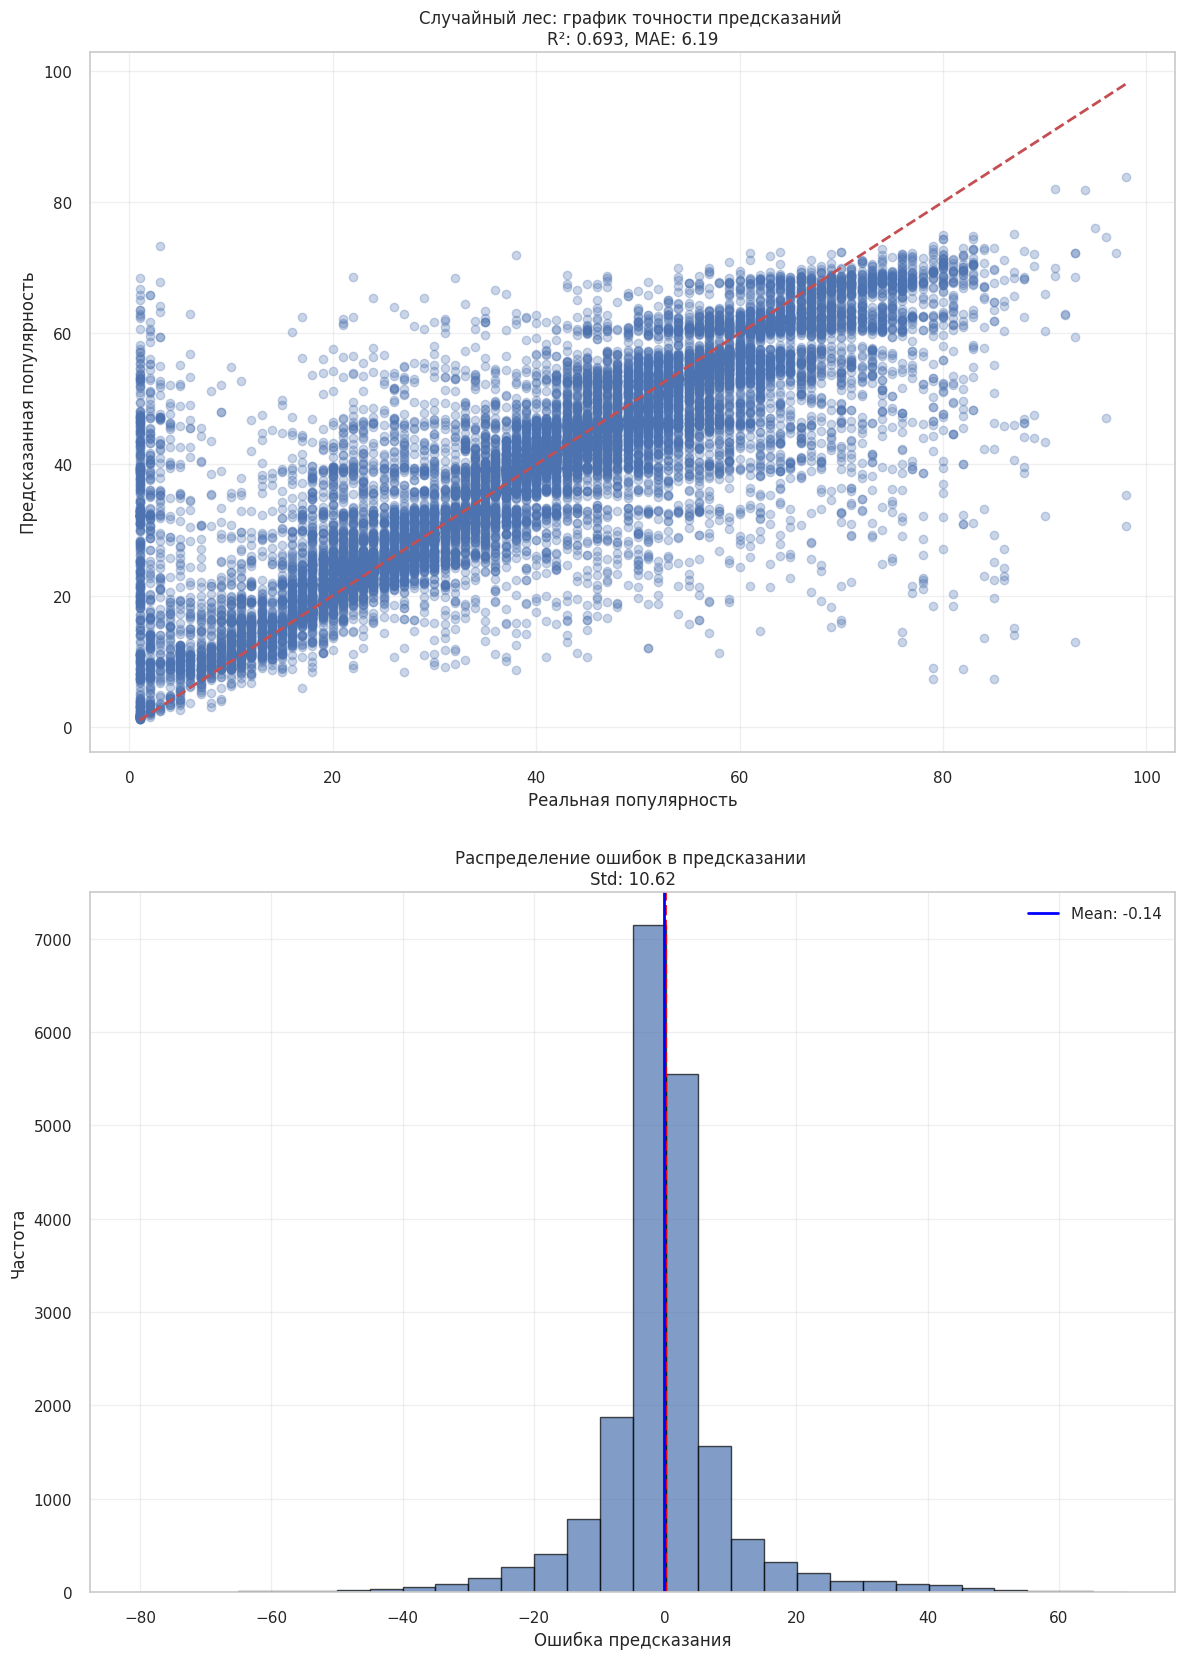

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 20))

# Оценка предсказаний
axes[0].scatter(y_test, y_pred, alpha=0.3)
axes[0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    lw=2)
axes[0].set_xlabel('Реальная популярность')
axes[0].set_ylabel('Предсказанная популярность')
axes[0].set_title(
    f'Случайный лес: график точности предсказаний \nR²: {t_r2:.3f}, MAE: {t_mae:.2f}'
    )
axes[0].grid(True, alpha=0.3)

# Распределение ошибок
errors = y_pred - y_test
axes[1].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].axvline(x=errors.mean(), color='blue', linestyle='-', linewidth=2, label=f'Mean: {errors.mean():.2f}')
axes[1].set_xlabel('Ошибка предсказания')
axes[1].set_ylabel('Частота')
axes[1].set_title(
    f'Распределение ошибок в предсказании \nStd: {errors.std():.2f}'
    )
axes[1].legend()
axes[1].grid(True, alpha=0.3)




### Сравнение с другими моделями


Лучшая модель по MAE (6.1942):  Случайный лес
Лучшая модель по MSE (112.8678):  Случайный лес
Лучшая модель по RMSE (10.6239):  Случайный лес


/tmp/ipython-input-4103387195.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


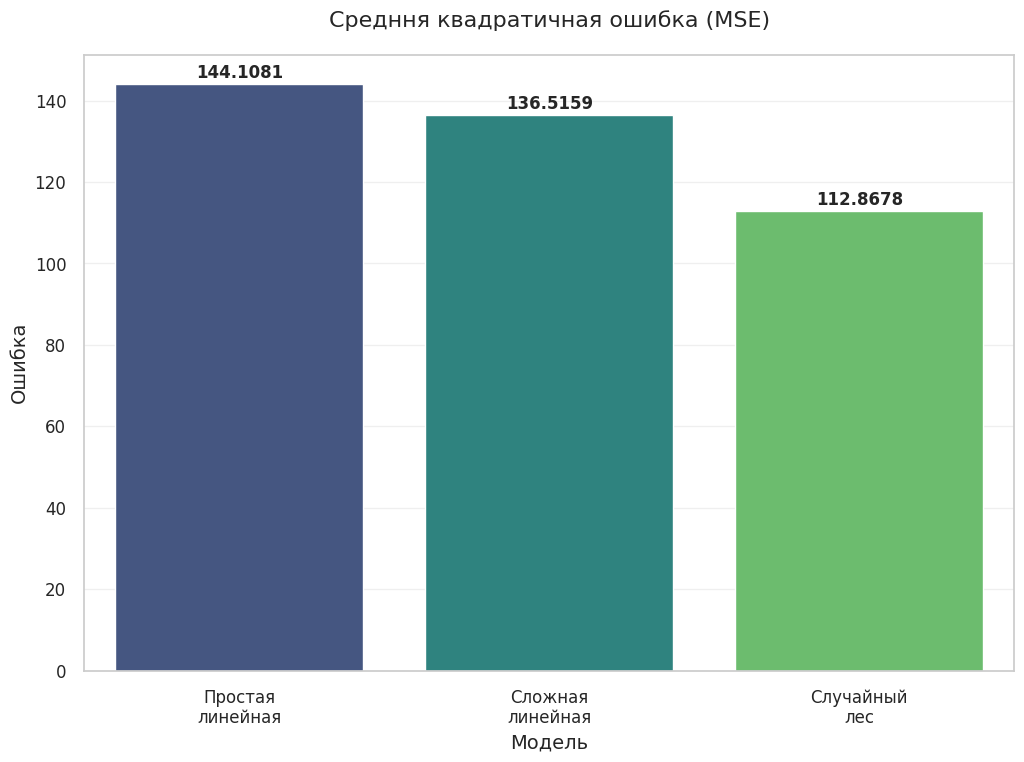

In [ ]:
rf_rmse = np.sqrt(t_mse)
f_test_rmse = np.sqrt(f_test_mse)

df_accuracy = pd.DataFrame({
    'Model': ['Простая\nлинейная', 'Сложная\nлинейная', 'Случайный\nлес'],
    'MSE': [f_test_mse, s_test_mse, t_mse]
})

df_accuracy = df_accuracy.sort_values('MSE', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_accuracy,
    x='Model',
    y='MSE',
    palette='viridis'
)

for i, v in enumerate(df_accuracy['MSE']):
    plt.text(i, v + max(df_accuracy['MSE'])*0.01,
             f'{v:.4f}', ha='center', fontweight='bold')

plt.title('Средння квадратичная ошибка (MSE)', fontsize=16, pad=20)
plt.xlabel('Модель', fontsize=14)
plt.ylabel('Ошибка', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

best_mae = min(f_test_mae, s_test_mae, t_mae)
best_mse = min(f_test_mse, s_test_mse, t_mse)
best_rmse = min(f_test_rmse, s_test_rmse, t_rmse)

print(f"\nЛучшая модель по MAE ({best_mae:.4f}): ",
      "Случайный лес" if best_mae == t_mae else
      "Сложная линейная" if best_mae == s_test_mae else "Простая линейная")

print(f"Лучшая модель по MSE ({best_mse:.4f}): ",
      "Случайный лес" if best_mse == t_mse else
      "Сложная линейная" if best_mse == s_test_mse else "Простая линейная")

print(f"Лучшая модель по RMSE ({best_rmse:.4f}): ",
      "Случайный лес" if best_rmse == t_rmse else
      "Сложная линейная" if best_rmse == s_test_rmse else "Простая линейная")


## Градиентный бустинг

### Обучение

In [ ]:
import xgboost as xgb


xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

fo_r2 = r2_score(y_test, y_pred_xgb)
fo_mse = mean_squared_error(y_test, y_pred_xgb)
fo_mae = mean_absolute_error(y_test, y_pred_xgb)
fo_rmse = np.sqrt(fo_mse)

print()
print(f"R² Score: {fo_r2:.4f}")
print(f"MSE: {fo_mse:.4f}")
print(f"MAE: {fo_mae:.4f}")
print(f"RMSE: {fo_rmse:.4f}")


R² Score: 0.6973
MSE: 111.4525
MAE: 6.2108
RMSE: 10.5571


### Визуализация предсказаний

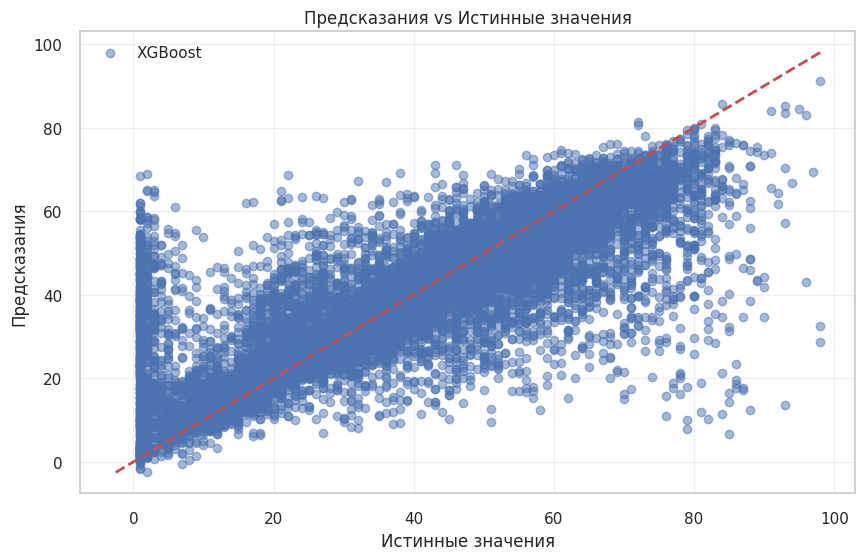

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost')
min_val = min(y_test.min(), y_pred_xgb.min())
max_val = max(y_test.max(), y_pred_xgb.max())
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'r--',
    lw=2
    )
plt.xlabel('Истинные значения')
plt.ylabel('Предсказания')
plt.title('Предсказания vs Истинные значения')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Сравнение с лучшей моделью: случайный лес


XGBoost vs Случайный лес:
R²: 0.6973 vs 0.6935
MSE: 111.4525 vs 112.8678
MAE: 6.2108 vs 6.1942
RMSE: 10.5571 vs 10.6239


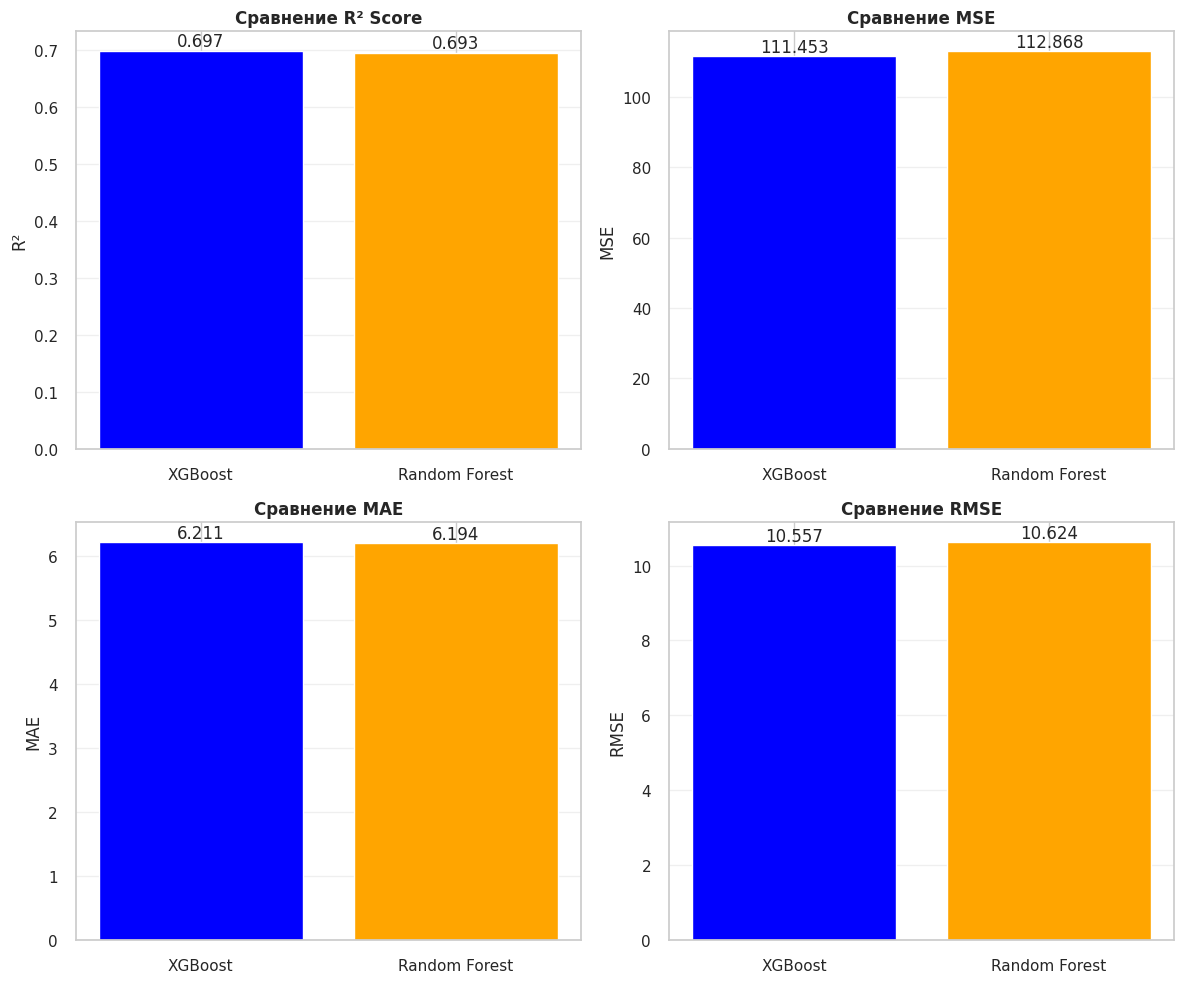

In [ ]:
print(f"\nXGBoost vs Случайный лес:")
print(f"R²: {fo_r2:.4f} vs {t_r2:.4f}")
print(f"MSE: {fo_mse:.4f} vs {t_mse:.4f}")
print(f"MAE: {fo_mae:.4f} vs {t_mae:.4f}")
print(f"RMSE: {fo_rmse:.4f} vs {t_rmse:.4f}")

metrics = {
    'R²': {'XGBoost': fo_r2, 'Random Forest': t_r2},
    'MSE': {'XGBoost': fo_mse, 'Random Forest': t_mse},
    'MAE': {'XGBoost': fo_mae, 'Random Forest': t_mae},
    'RMSE': {'XGBoost': fo_rmse, 'Random Forest': t_rmse}
}

# Создаем график
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# График 1: Сравнение R²
axes[0, 0].bar(['XGBoost', 'Random Forest'],
               [metrics['R²']['XGBoost'], metrics['R²']['Random Forest']],
               color=['blue', 'orange'])
axes[0, 0].set_title('Сравнение R² Score', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('R²')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([metrics['R²']['XGBoost'], metrics['R²']['Random Forest']]):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# График 2: Сравнение MSE
axes[0, 1].bar(['XGBoost', 'Random Forest'],
               [metrics['MSE']['XGBoost'], metrics['MSE']['Random Forest']],
               color=['blue', 'orange'])
axes[0, 1].set_title('Сравнение MSE', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([metrics['MSE']['XGBoost'], metrics['MSE']['Random Forest']]):
    axes[0, 1].text(i, v + max([metrics['MSE']['XGBoost'], metrics['MSE']['Random Forest']])*0.01,
             f'{v:.3f}', ha='center')

# График 3: Сравнение MAE
axes[1, 0].bar(['XGBoost', 'Random Forest'],
               [metrics['MAE']['XGBoost'], metrics['MAE']['Random Forest']],
               color=['blue', 'orange'])
axes[1, 0].set_title('Сравнение MAE', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([metrics['MAE']['XGBoost'], metrics['MAE']['Random Forest']]):
    axes[1, 0].text(i, v + max([metrics['MAE']['XGBoost'], metrics['MAE']['Random Forest']])*0.01,
             f'{v:.3f}', ha='center')

# График 4: Сравнение RMSE
axes[1, 1].bar(['XGBoost', 'Random Forest'],
               [metrics['RMSE']['XGBoost'], metrics['RMSE']['Random Forest']],
               color=['blue', 'orange'])
axes[1, 1].set_title('Сравнение RMSE', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([metrics['RMSE']['XGBoost'], metrics['RMSE']['Random Forest']]):
    axes[1, 1].text(i, v + max([metrics['RMSE']['XGBoost'], metrics['RMSE']['Random Forest']])*0.01,
             f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

## Нейронная сеть

### Обучение

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

print(f"Оригинальные признаки: {X_poly_train_scaled.shape[1]}")
print(f"Полиномиальные признаки (2 степень): {X_poly_test_scaled.shape[1]}")

model = keras.Sequential([
    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0005),
                 input_shape=(X_poly_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0005)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1)
])

optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae', 'mse']
)

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=16,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=8,
        min_lr=0.00001,
        verbose=1
    )
]

history = model.fit(
    X_poly_train_scaled,
    y_train,
    epochs=52,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

y_pred_nn = model.predict(X_poly_test_scaled).flatten()

nn_r2 = r2_score(y_test, y_pred_nn)
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(nn_mse)


Оригинальные признаки: 135
Полиномиальные признаки (2 степень): 135


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/52
980/980 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 553.2886 - mae: 17.0126 - mse: 552.9899 - val_loss: 151.7619 - val_mae: 8.0828 - val_mse: 151.4238 - learning_rate: 0.0010
Epoch 2/52
980/980 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 194.9164 - mae: 9.9618 - mse: 194.5677 - val_loss: 145.3989 - val_mae: 7.9040 - val_mse: 145.0179 - learning_rate: 0.0010
Epoch 3/52
980/980 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 187.0217 - mae: 9.6319 - mse: 186.6292 - val_loss: 133.8333 - val_mae: 7.1240 - val_mse: 133.4048 - learning_rate: 0.0010
Epoch 4/52
980/980 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 176.6008 - mae: 9.3247 - mse: 176.1599 - val_loss: 132.3066 - val_mae: 6.9167 - val_mse: 131.8262 - learning_rate: 0.0010
Epoch 5/52
980/980 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 173.9198 - mae: 9.2106 - mse: 173.4252 - val_loss: 137.8691 - val_mae: 7.5093 - val_mse: 137.3284 - learning_rate: 0.0010
Epoch 6/52
980/980 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 167.4919 - mae: 9

### Визуализация итогов

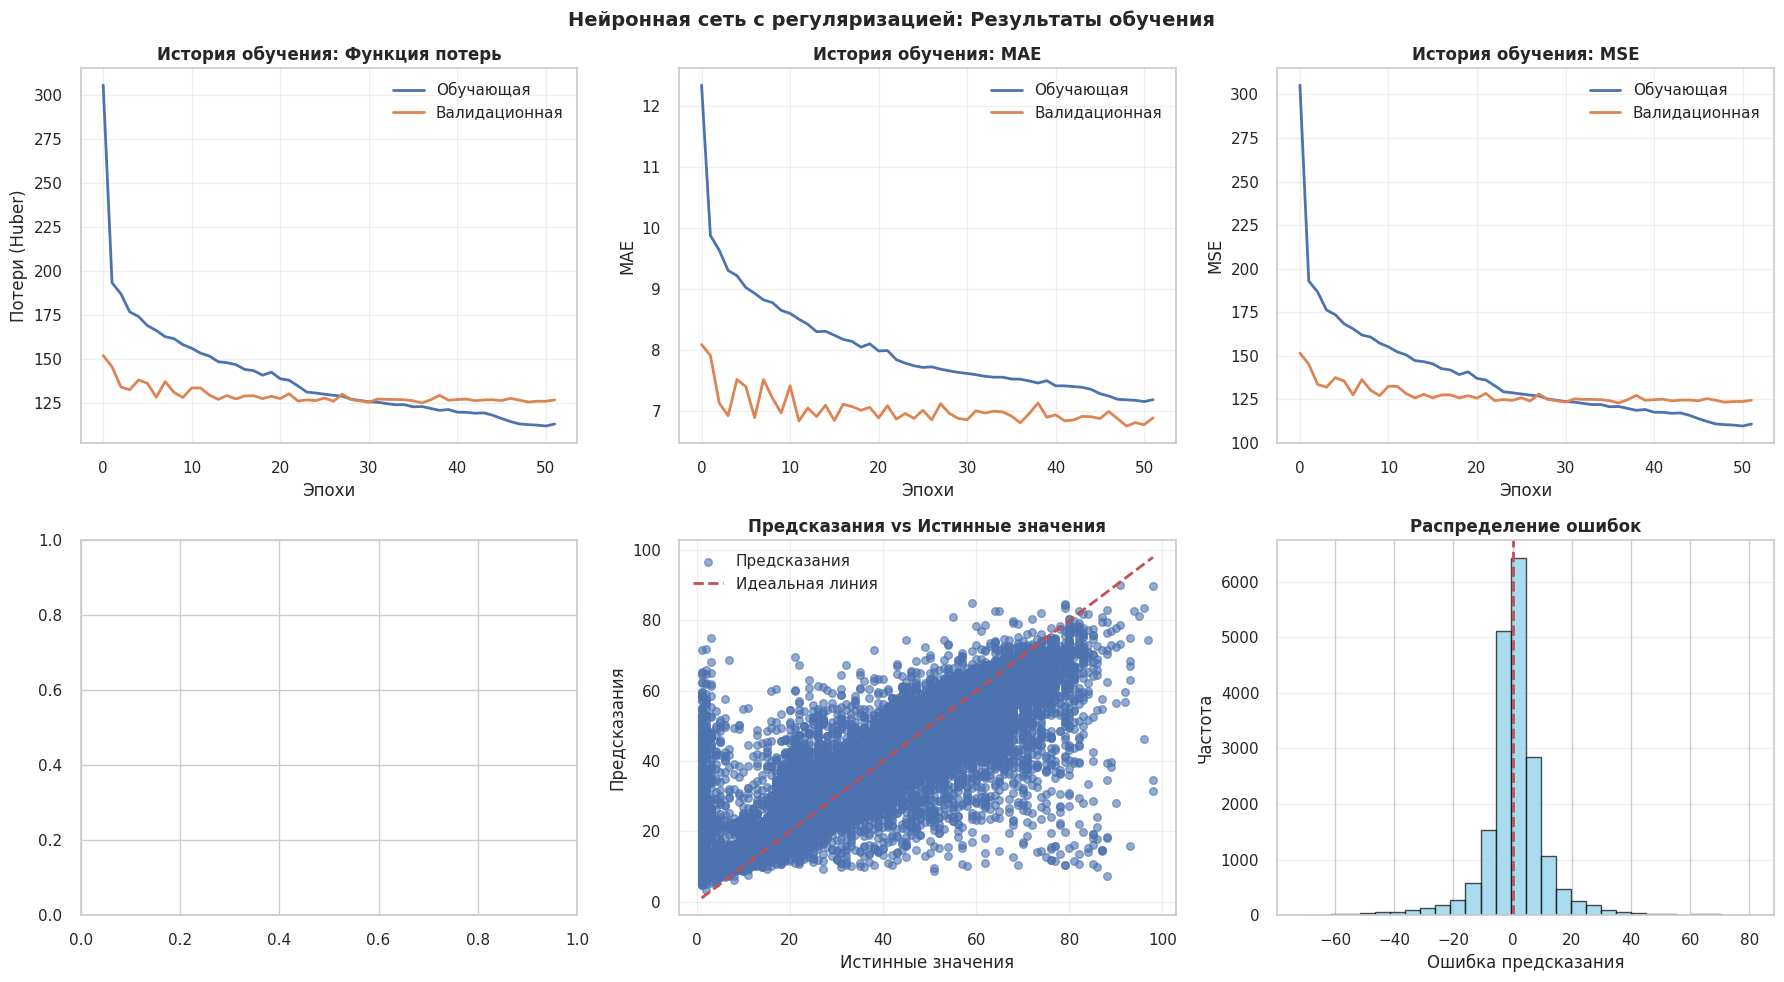

R² Score: 0.6805
MSE: 117.6255
MAE: 6.6865
RMSE: 10.8455


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].plot(history.history['loss'], label='Обучающая', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Валидационная', linewidth=2)
axes[0, 0].set_xlabel('Эпохи')
axes[0, 0].set_ylabel('Потери (Huber)')
axes[0, 0].set_title('История обучения: Функция потерь', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(history.history['mae'], label='Обучающая', linewidth=2)
axes[0, 1].plot(history.history['val_mae'], label='Валидационная', linewidth=2)
axes[0, 1].set_xlabel('Эпохи')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('История обучения: MAE', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].plot(history.history['mse'], label='Обучающая', linewidth=2)
axes[0, 2].plot(history.history['val_mse'], label='Валидационная', linewidth=2)
axes[0, 2].set_xlabel('Эпохи')
axes[0, 2].set_ylabel('MSE')
axes[0, 2].set_title('История обучения: MSE', fontsize=12, fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

if 'lr' in history.history:
    axes[1, 0].plot(history.history['lr'], linewidth=2)
    axes[1, 0].set_xlabel('Эпохи')
    axes[1, 0].set_ylabel('Learning Rate')
    axes[1, 0].set_title('Изменение Learning Rate', fontsize=12, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(y_test, y_pred_nn, alpha=0.6, s=30, label='Предсказания')
min_val = min(y_test.min(), y_pred_nn.min())
max_val = max(y_test.max(), y_pred_nn.max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Идеальная линия')
axes[1, 1].set_xlabel('Истинные значения')
axes[1, 1].set_ylabel('Предсказания')
axes[1, 1].set_title('Предсказания vs Истинные значения', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

errors = y_test.flatten() - y_pred_nn
axes[1, 2].hist(errors, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 2].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 2].set_xlabel('Ошибка предсказания')
axes[1, 2].set_ylabel('Частота')
axes[1, 2].set_title('Распределение ошибок', fontsize=12, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.suptitle('Нейронная сеть с регуляризацией: Результаты обучения', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"R² Score: {nn_r2:.4f}")
print(f"MSE: {nn_mse:.4f}")
print(f"MAE: {nn_mae:.4f}")
print(f"RMSE: {nn_rmse:.4f}")


/tmp/ipython-input-2478761253.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='coolwarm')


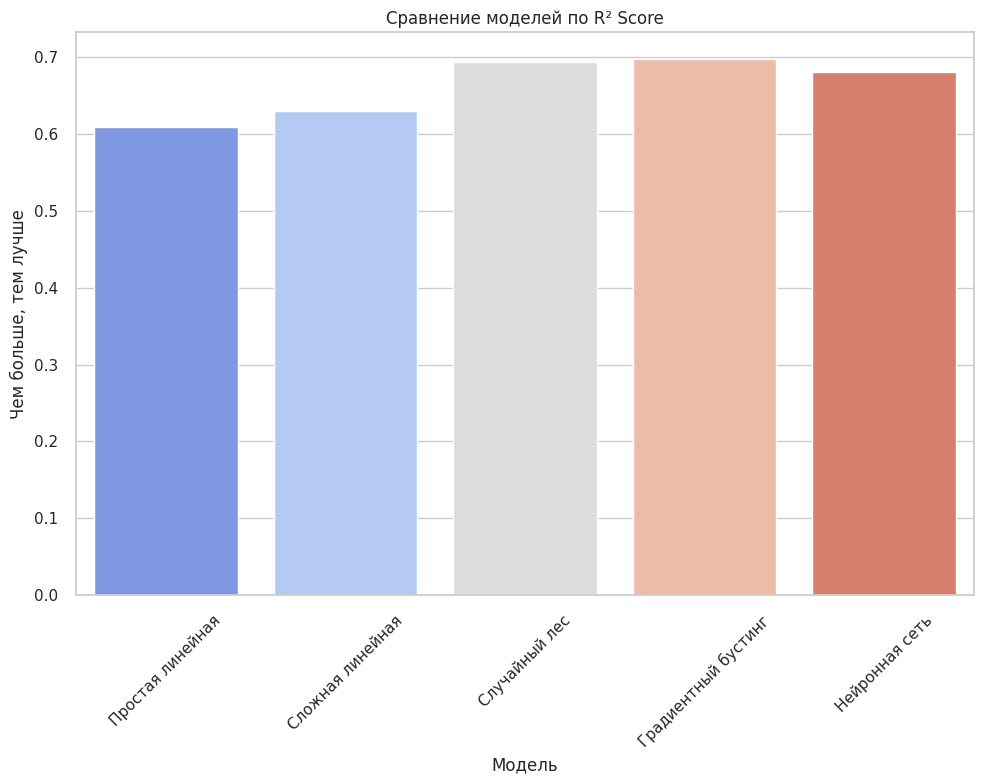

/tmp/ipython-input-2478761253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_scores, palette='coolwarm')


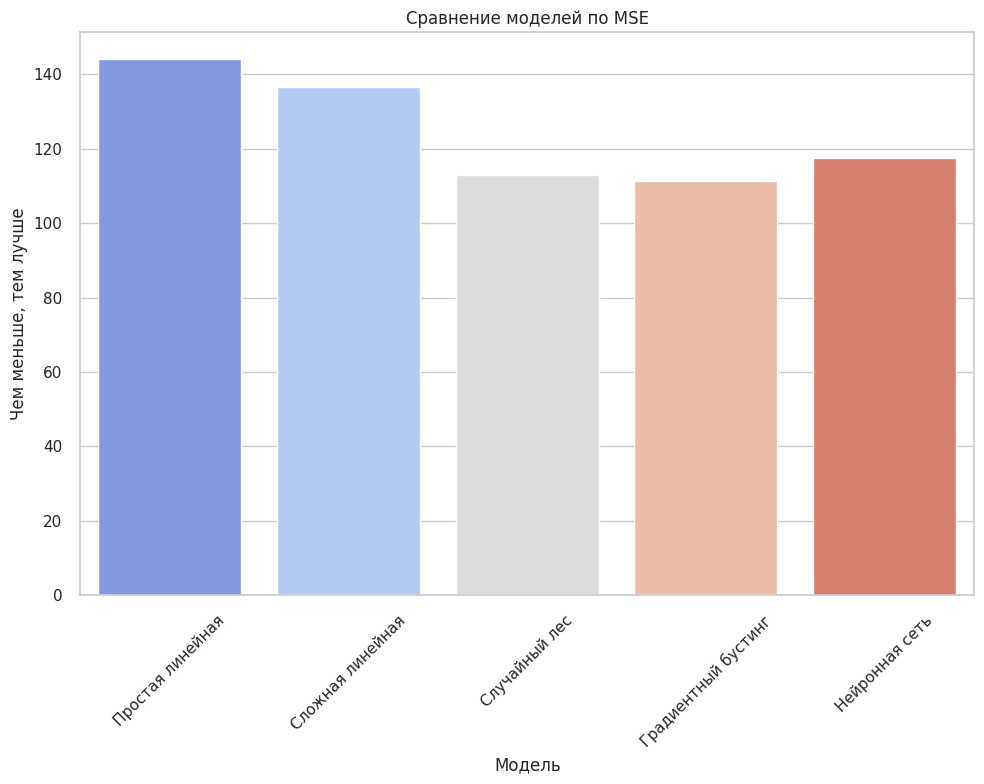

/tmp/ipython-input-2478761253.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_scores, palette='coolwarm')


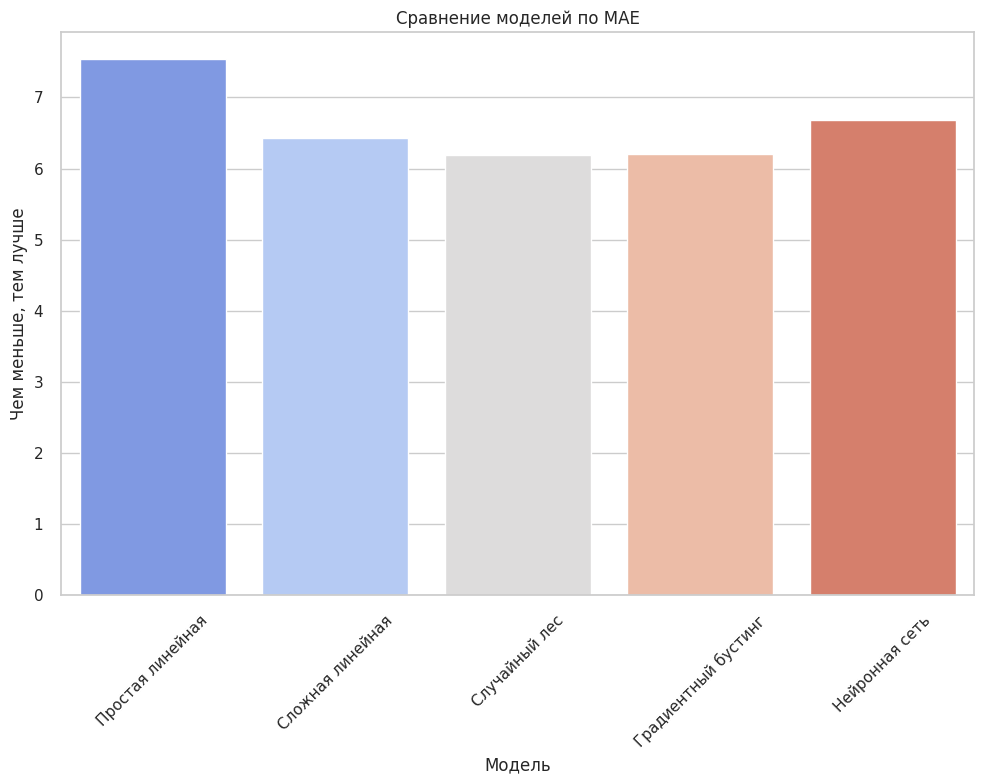

/tmp/ipython-input-2478761253.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_scores, palette='coolwarm')


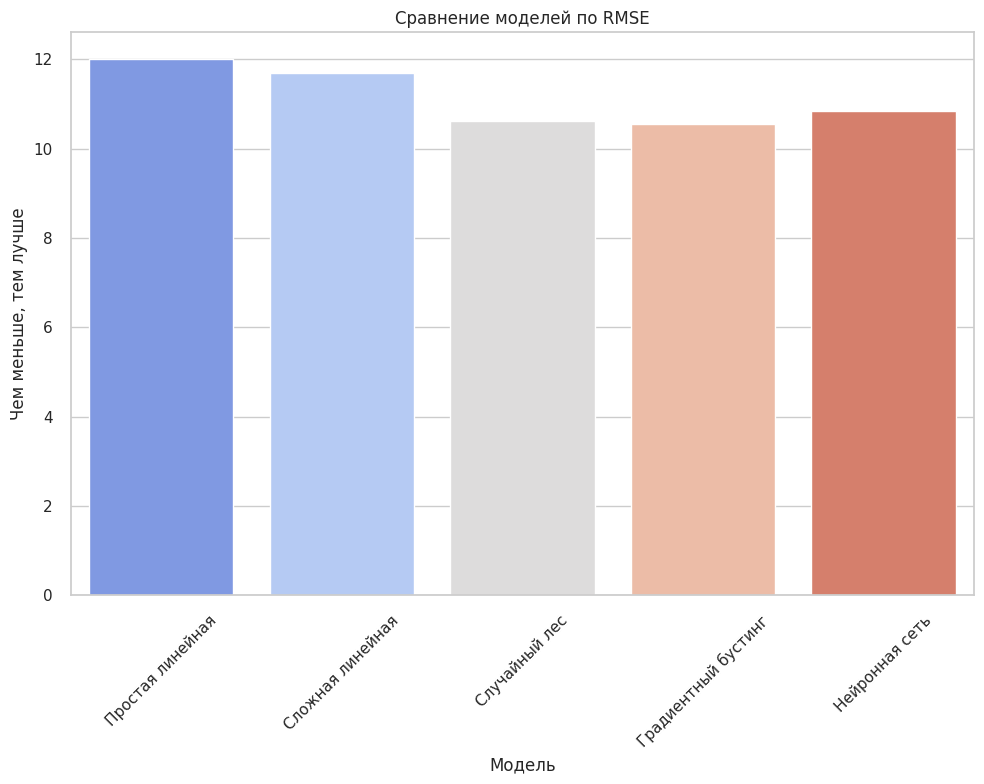


Лучшая модель: Градиентный бустинг
Побед в категориях: 3/4

Градиентный бустинг лучше Простая линейная:
  R²: +14.6%
  MSE: +22.7%
  MAE: +17.6%
  RMSE: +12.1%

Градиентный бустинг лучше Сложная линейная:
  R²: +10.8%
  MSE: +18.4%
  MAE: +3.4%
  RMSE: +9.6%

Градиентный бустинг лучше Случайный лес:
  R²: +0.6%
  MSE: +1.3%
  MAE: +-0.3%
  RMSE: +0.6%

Градиентный бустинг лучше Нейронная сеть:
  R²: +2.5%
  MSE: +5.2%
  MAE: +7.1%
  RMSE: +2.7%


In [ ]:
models = ['Простая линейная', 'Сложная линейная', 'Случайный лес', 'Градиентный бустинг', 'Нейронная сеть']

# Данные метрик
r2_scores = [f_r2, s_r2, t_r2, fo_r2, nn_r2]
mse_scores = [f_test_mse, s_test_mse, t_mse, fo_mse, nn_mse]
mae_scores = [f_test_mae, s_test_mae, t_mae, fo_mae, nn_mae]
rmse_scores = [f_test_rmse, s_test_rmse, t_rmse, fo_rmse, nn_rmse]

# График R² Score
plt.figure(figsize=(10, 8))
sns.barplot(x=models, y=r2_scores, palette='coolwarm')
plt.title('Сравнение моделей по R² Score')
plt.xlabel('Модель')
plt.ylabel('Чем больше, тем лучше')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График MSE
plt.figure(figsize=(10, 8))
sns.barplot(x=models, y=mse_scores, palette='coolwarm')
plt.title('Сравнение моделей по MSE')
plt.xlabel('Модель')
plt.ylabel('Чем меньше, тем лучше')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График MAE
plt.figure(figsize=(10, 8))
sns.barplot(x=models, y=mae_scores, palette='coolwarm')
plt.title('Сравнение моделей по MAE')
plt.xlabel('Модель')
plt.ylabel('Чем меньше, тем лучше')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График RMSE
plt.figure(figsize=(10, 8))
sns.barplot(x=models, y=rmse_scores, palette='coolwarm')
plt.title('Сравнение моделей по RMSE')
plt.xlabel('Модель')
plt.ylabel('Чем меньше, тем лучше')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Определение лучшей модели
best_model_by_metric = {
    'R²': models[np.argmax(r2_scores)],
    'MSE': models[np.argmin(mse_scores)],
    'MAE': models[np.argmin(mae_scores)],
    'RMSE': models[np.argmin(rmse_scores)]
}

wins = {model: 0 for model in models}
for metric, best_model in best_model_by_metric.items():
    wins[best_model] += 1

best_model = max(wins, key=wins.get)


print(f"\nЛучшая модель: {best_model}")
print(f"Побед в категориях: {wins[best_model]}/4")

best_idx = models.index(best_model)

for i, model in enumerate(models):
    if model != best_model:
        r2_imp = ((r2_scores[best_idx] - r2_scores[i]) / abs(r2_scores[i])) * 100
        mse_imp = ((mse_scores[i] - mse_scores[best_idx]) / mse_scores[i]) * 100
        mae_imp = ((mae_scores[i] - mae_scores[best_idx]) / mae_scores[i]) * 100
        rmse_imp = ((rmse_scores[i] - rmse_scores[best_idx]) / rmse_scores[i]) * 100

        print(f"\n{best_model} лучше {model}:")
        print(f"  R²: +{r2_imp:.1f}%")
        print(f"  MSE: +{mse_imp:.1f}%")
        print(f"  MAE: +{mae_imp:.1f}%")
        print(f"  RMSE: +{rmse_imp:.1f}%")

Несмотря на хорошие показатели нейронной сети, модель градиентного бустинга оказалась все равно лучше: в среднем на 2%.

# Вывод

В данной работе был детально проанализирован датасет, выдвинуты 1+3 гипотезы: 3 из которых подтвердились.

В датасет были добавлены следующие параметры: 'explicit_bin' 'track_genre_int', 'is_top_genre', 'is_high_loudness', 'is_high_danceability', 'hit_score_dance', 'main_artist_id',
'main_artist_avg_pop'.

Были убраны записи с popularity=0 в количестве